# Experiments with Sparse Distributed Memory

This notebook explores Sparse Distributed Memory (SDM) through various experiments. Core functionality is provided by the `KanervaSDM` module, developed from Pentti Kanerva's 1992 work *Sparse Distributed Memory and Related Models*. The `KanervaSDM` module operates on binary address and memory vectors, and provides a low-level foundation for more sophisticated implementations. This notebook assumes a familiarity with vector and matrix operations, and of course a basic understanding of Sparse Distributed Memory. 

Sparse Distributed Memory (SDM) is an associative (distributed) memory model inspired by human longterm memory that stores information across distributed hard locations in a high-dimensional (sparse) binary space. When storing a memory, the address vector activates hard locations within a certain Hamming distance threshold, and the memory vector is written to the locations at those activated locations. During retrieval, the same address (or a similiar address) reactivates similar hard locations, and the stored memory is reconstructed by summing and thresholding the location values across activated locations. SDM exhibits unique behaviour allowing new memories to either reinforce prior memories or cause them to be forgotten. 

The experiments in this notebook will generally set the address and memory dimensions to be equal and refer to both as simply "dimension", however the `KanervaSDM` module does allow them to be different. Also, SDM of dimension 100 with 10,000 hard locations, and an activation threshold of 37 will be considered the "standard" configuration, as it offers a balance of memory performance and computational speed to make the experiments in this notebook practical.

© 2025 Simon Wong

**Table of Contents**

- 1.0 SDM experiments with address and memory vectors that are different
    - 1.1 Storing and recalling a single memory, then calculating error
    - 1.2 Storing and recalling multiple memories, then calculating error after all memories have been stored
    - 1.3 Storing and recalling multiple memories, calculating error after each new memory is stored
    - 1.4 Varying dimension 
    - 1.5 Varying activation threshold
    - 1.6 Varying number of hard locations 
- 2.0 SDM experiments with address and memory vectors that are the same 
    - 2.1 Storing and recalling a single memory, then calculating error
    - 2.2 Storing and recalling multiple memories, then calculating error after all memories have been stored
    - 2.3 Storing and recalling multiple memories, calculating error after each new memory is stored
    - 2.4 Varying dimension 
    - 2.5 Varying activation threshold
    - 2.6 Varying number of hard locations 
- 3.0 Experiments with visualizing SDM matrices
    - 3.1 Address and memory vectors that are different and both random
    - 3.2 Address and memory vectors that are the same and both random
    - 3.3 Address and memory vectors that are different, with random addresses and non-random memories
    - 3.4 Adddess and memory vectors that are different, with non-random andresses and random memories
    - 3.5 Address and memory vectors that are the same and both non-random
    - 3.6 Random addresses and memories, with each memory being the address of the next memory
- 4.0 Storing images of numerals in SDM
    - 4.1 Storing images of numerals in SDM and adding random memories
    - 4.2 Storing images of numerals in SDM and corrupting the memory addresses
    - 4.3 Storing images of numerals in SDM, adding random memories, and corrupting the memory addresses
- 5.0 Other experiments with SDM
    - 5.1 Storing and recalling dense data
    - 5.2 Varying the address dimension relative to the memory dimension

***

In [1]:
from kanerva_sdm import KanervaSDM
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm



## 1.0 SDM experiments with address and memory vectors that are different

SDM with address and memory vectors that are different represent a more general case, and tend to exhibit worse recall performance than SDM with address and memory vectors that are the same. 

All the experiments in this section (1.1-1.6) use address and memory vectors that are different. 

***

### 1.1 Storing and recalling a single memory, then calculating error

In this experiment: 
- Address and memory dimensions are equal. 
- Address and memory vectors are different. 
- The "standard" SDM configuration is used. 

The output shows that with only one stored memory, there is no recall error. 

***

In [2]:
SDM = KanervaSDM(
    address_dimension=100, 
    memory_dimension=100, 
    num_locations=10000,
    activation_threshold=37 
)

# Create random address vector and memory vector.
address = np.random.randint(0, 2, SDM.memory_dimension)
memory = np.random.randint(0, 2, SDM.memory_dimension)

# Write memory. 
SDM.write(address, memory)

# Read memory. 
recalled_memory = SDM.read(address)

# Calculate error. 
error = np.sum(memory != recalled_memory) / SDM.memory_dimension * 100

print(f"\nOriginal memory: \n{memory}")

print(f"\nRecalled memory: \n{recalled_memory}")

print(f"\nRecall error: {error:.2f}%.")


Original memory: 
[1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1]

Recalled memory: 
[1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1]

Recall error: 0.00%.


### 1.2 Storing and recalling multiple memories, then calculating error after all memories have been stored

In this experiment: 
- Address and memory dimensions are equal. 
- Address and memory vectors are different. 
- Memories are read and error is calculated only after all memories have been written. 

The output shows that once many memories are stored, SDM starts to decay.

***

In [3]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

num_memories = 1000

# Create arrays for storing addresses and memories. 
addresses = np.empty((num_memories, SDM.address_dimension))
memories = np.empty((num_memories, SDM.memory_dimension))
recalled_memories = np.empty((num_memories, SDM.memory_dimension))
errors = np.empty(num_memories)

# Write all memories. 
for i in range(num_memories): 
    address = np.random.randint(0, 2, SDM.address_dimension)
    memory = np.random.randint(0, 2, SDM.memory_dimension)
    addresses[i] = address
    memories[i] = memory
    SDM.write(address, memory)
    
# Read all memories.  
for i in range(num_memories): 
    address = addresses[i]
    recalled_memory = SDM.read(address)
    recalled_memories[i] = recalled_memory
    
# Calcuate error. 
for i in range(num_memories):
    errors[i] = np.sum(memories[i] != recalled_memories[i])
    
mean_error = np.mean(errors) / SDM.memory_dimension * 100
max_error = np.max(errors) / SDM.memory_dimension *100

print(f"\nMean recall error: {mean_error:.2f}%.")
print(f"\nMax recall error: {max_error:.2f}%.")


Mean recall error: 0.66%.

Max recall error: 5.00%.


### 1.3 Storing and recalling multiple memories, calculating error after each new memory is stored

In this experiment: 
- Address and memory dimensions are equal. 
- Address and memory vectors are different. 
- The "standard" SDM configuration is used. 
- Memories are read and error is calculated after each new memory is written. 
- Activation threshold is intentionally bad, to show memory decay as new memories are addded. 

This cell takes around ten seconds (10s) to run. 

The outputted plot shows that as the number of stored memories increases, the recall performance decreases, and more 
errors occur. 

***

100%|██████████| 100/100 [00:08<00:00, 11.42it/s]



Final mean recall error: 30.62%

Final max recall error: 43.00%


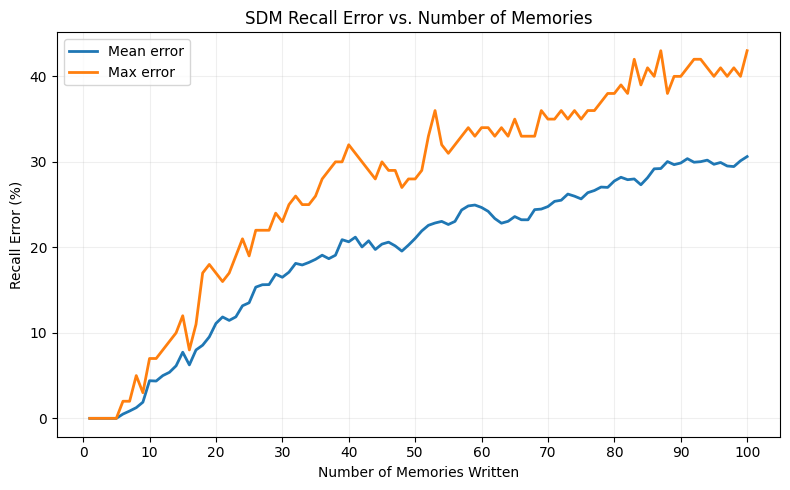

In [4]:
SDM = KanervaSDM(
    address_dimension=100, 
    memory_dimension=100, 
    num_locations=10000,  
    activation_threshold=45  # Bad activation threshold intentional, to show memory decay. 
)

num_memories = 100

addresses = []
memories = []
mean_errors = []
max_errors = []

for i in tqdm(range(num_memories)): 
    # Generate and store new memory. 
    address = np.random.randint(0, 2, SDM.address_dimension)
    memory = np.random.randint(0, 2, SDM.memory_dimension)
    
    addresses.append(address)
    memories.append(memory)
    
    SDM.write(address, memory)
    
    # Check recall error for all memories written so far. 
    errors = []
    for j in range(i + 1):
        recalled_memory = SDM.read(addresses[j])
        error = np.sum(memories[j] != recalled_memory)
        errors.append(error)
    
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_error = np.max(errors) / SDM.memory_dimension * 100
    max_errors.append(max_error)

print(f"\nFinal mean recall error: {mean_errors[-1]:.2f}%")
print(f"\nFinal max recall error: {max_errors[-1]:.2f}%")

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_memories + 1), mean_errors, linewidth=2, label="Mean error")
plt.plot(range(1, num_memories + 1), max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Memories Written")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Memories")
plt.xticks(range(0, num_memories + 1, 10))  # Every 10th integer. 
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 1.4 Varying dimension

In this experiment: 
- Address and memory dimensions are equal, and they are incremented from 10 to 500. 
- Address and memory vectors are different. 
- The number of stored memories is equal to the dimension value. 

This cell takes around ten seconds (30s) to run. 

The outputted plot shows that the optimal dimension is 100. However, the optimal dimension is related to the activation threshold, which for all dimensions was set to 37. 

***

100%|██████████| 6/6 [00:41<00:00,  6.90s/it]


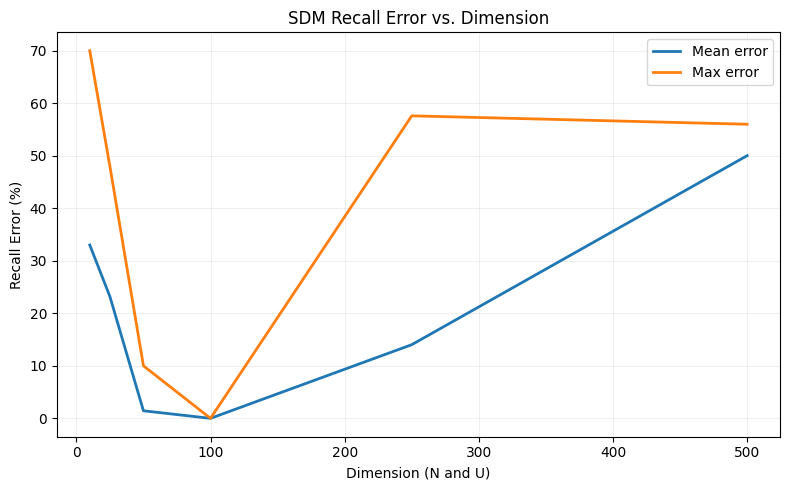

In [5]:
dimensions = [10, 25, 50, 100, 250, 500]
mean_errors = []
max_errors = []

# Outer loop over dimensions. 
for dim in tqdm(dimensions):
    SDM = KanervaSDM(
        address_dimension=dim,
        memory_dimension=dim,
        num_locations=dim**2,  
        activation_threshold=0.37*dim  # This activation threshold is best suited for dimension of 100. 
    )
    num_memories = 100

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.random.randint(0, 2, SDM.memory_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories.
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors.
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(dimensions, mean_errors, linewidth=2, label="Mean error")
plt.plot(dimensions, max_errors, linewidth=2, label="Max error")
plt.xlabel("Dimension (N and U)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Dimension")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 1.5 Varying activation threshold

In this experiment: 
- Address and memory dimensions are equal, and they have a value of 100. 
- Address and memory vectors are different. 
- Activation threshold is incremented from 0 to 100. 

This cell takes around thirty seconds (30s) to run. 

The outputted plot shows that for SDM with dimension 100, the optimal activation threshold is approximately 37. 
However, optimal activation threshold is not universally 0.37 times the dimension. 

***

100%|██████████| 100/100 [00:51<00:00,  1.93it/s]


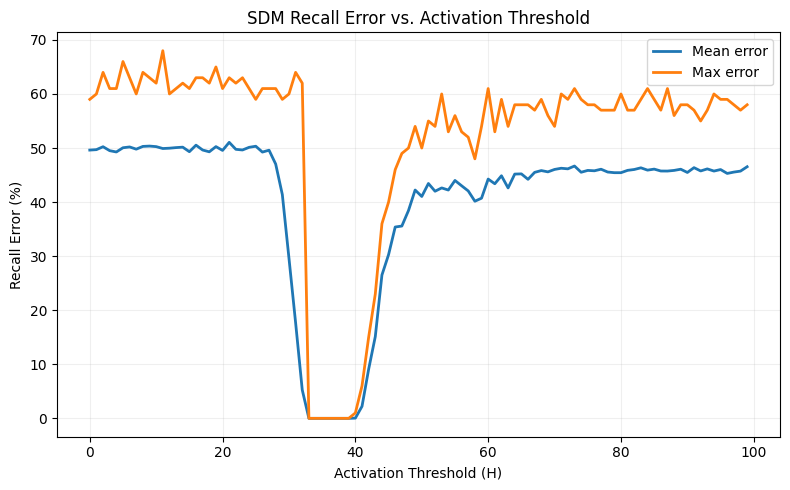

In [6]:
activation_thresholds = np.arange(0, 100, 1)
mean_errors = []
max_errors = []

# Outer loop over activation thresholds. 
for H in tqdm(activation_thresholds):
    SDM = KanervaSDM(
        address_dimension=100,
        memory_dimension=100,
        num_locations=10000,  
        activation_threshold=H
    )
    num_memories = 100

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories. 
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.random.randint(0, 2, SDM.memory_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories. 
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors. 
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(activation_thresholds, mean_errors, linewidth=2, label="Mean error")
plt.plot(activation_thresholds, max_errors, linewidth=2, label="Max error")
plt.xlabel("Activation Threshold (H)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Activation Threshold")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 1.6 Varying number of hard locations

In this experiment: 
- Address and memory dimensions are equal, and they have a value of 100
- Address and memory vectors are different. 
- Number of hard locations is incremented from 1 to 10000. 

This cell takes around thirty seconds (30s) to run. 

The outputted plot shows that increasing the number of hard locations decreases the error. Unfortunately, increasing the number of hard locations also increases the computational cost. 

***

100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


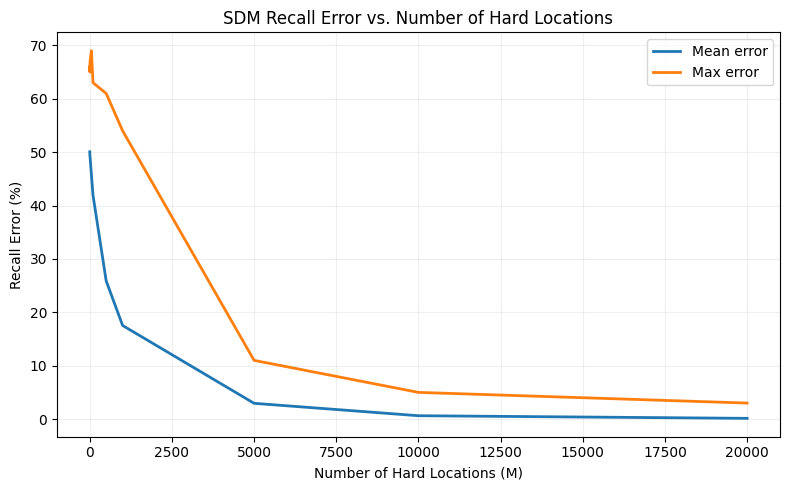

In [7]:
from tqdm import tqdm

num_locations = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 20000]
mean_errors = []
max_errors = []

# Outer loop over activation thresholds. 
for M in tqdm(num_locations):
    SDM = KanervaSDM(
        address_dimension=100,
        memory_dimension=100,
        num_locations=M,  
        activation_threshold=37
    )
    num_memories = 1000

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.random.randint(0, 2, SDM.memory_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories. 
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors. 
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(num_locations, mean_errors, linewidth=2, label="Mean error")
plt.plot(num_locations, max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Hard Locations (M)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Hard Locations")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()



## 2.0 SDM experiments with address and memory vectors that are the same 

SDM with address and memory vectors that are the same generally performs better. This is because memories represent their own addresses, which means that generally memories are reinforced by the memories similar to it. 

All the experiments in this section (2.1-2.6) use address and memory vectors that are the same. The experiments in this section (2.1-2.6) mirror experiments 1.1-1.6, except with matching address and memory vectors. 

***

### 2.1 Storing and recalling a single memory, then calculating error

In this experiment: 
- Address and memory dimensions are equal. 
- Address and memory vectors are the same. 
- The "standard" SDM configuration is used. 

The output shows that with only one stored memory, there is no recall error. 

***

In [8]:
SDM = KanervaSDM(
    address_dimension=100, 
    memory_dimension=100, 
    num_locations=10000,
    activation_threshold=37 
)

# Create random address vector and memory vector.
address = np.random.randint(0, 2, SDM.memory_dimension)
memory = address.copy()

# Write memory. 
SDM.write(address, memory)

# Read memory. 
recalled_memory = SDM.read(address)

# Calculate error. 
error = np.sum(memory != recalled_memory) / SDM.memory_dimension * 100

print(f"\nOriginal memory: \n{memory}")

print(f"\nRecalled memory: \n{recalled_memory}")

print(f"\nRecall error: {error:.2f}%.")


Original memory: 
[1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1]

Recalled memory: 
[1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1]

Recall error: 0.00%.


### 2.2 Storing and recalling multiple memories, then calculating error after all memories have been stored

In this experiment: 
- Address and memory dimensions are equal. 
- Address and memory vectors are the same. 
- The "standard" SDM configuration is used. 
- Memories are read and error is calculated only after all memories have been written. 

The output shows that once many memories are stored, SDM starts to decay. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

***

In [9]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

num_memories = 1000

# Create arrays for storing addresses and memories. 
addresses = np.empty((num_memories, SDM.address_dimension))
memories = np.empty((num_memories, SDM.memory_dimension))
recalled_memories = np.empty((num_memories, SDM.memory_dimension))
errors = np.empty(num_memories)

# Write all memories. 
for i in range(num_memories): 
    address = np.random.randint(0, 2, SDM.address_dimension)
    memory = address.copy()
    addresses[i] = address
    memories[i] = memory
    SDM.write(address, memory)
    
# Read all memories.  
for i in range(num_memories): 
    address = addresses[i]
    recalled_memory = SDM.read(address)
    recalled_memories[i] = recalled_memory
    
# Calcuate error:  
for i in range(num_memories):
    errors[i] = np.sum(memories[i] != recalled_memories[i])
    
mean_error = np.mean(errors) / SDM.memory_dimension * 100
max_error = np.max(errors) / SDM.memory_dimension *100

print(f"\nMean recall error: {mean_error:.2f}%.")
print(f"\nMax recall error: {max_error:.2f}%.")


Mean recall error: 0.07%.

Max recall error: 2.00%.


### 2.3 Storing and recalling multiple memories, calculating error after each new memory is stored

In this experiment: 
- Address and memory dimensions are equal. 
- Address and memory vectors are the same. 
- The "standard" SDM configuration is used. 
- Memories are read and error is calculated after each new memory is written. 
- Activation threshold is intentionally bad, to show memory decay as new memories are addded. 

This cell takes around ten seconds (10s) to run. 

The outputted plot shows that as the number of stored memories increases, the recall performance decreases, and more errors occur. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

***

100%|██████████| 100/100 [00:08<00:00, 11.27it/s]



Final mean recall error: 24.49%

Final max recall error: 32.00%


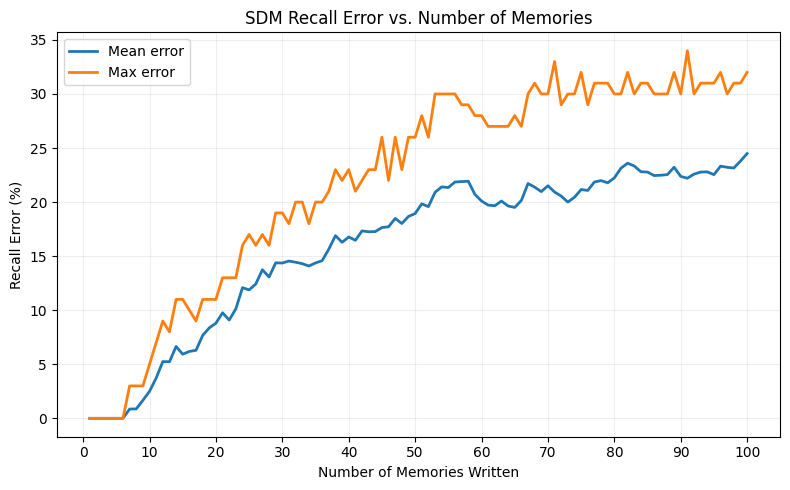

In [10]:
SDM = KanervaSDM(
    address_dimension=100, 
    memory_dimension=100, 
    num_locations=10000,  
    activation_threshold=45  # Bad activation threshold intentional, to show memory decay. 
)

num_memories = 100

addresses = []
memories = []
mean_errors = []
max_errors = []

for i in tqdm(range(num_memories)): 
    # Generate and store new memory. 
    address = np.random.randint(0, 2, SDM.address_dimension)
    memory = address.copy()
    
    addresses.append(address)
    memories.append(memory)
    
    SDM.write(address, memory)
    
    # Check recall error for all memories written so far. 
    errors = []
    for j in range(i + 1):
        recalled_memory = SDM.read(addresses[j])
        error = np.sum(memories[j] != recalled_memory)
        errors.append(error)
    
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_error = np.max(errors) / SDM.memory_dimension * 100
    max_errors.append(max_error)

print(f"\nFinal mean recall error: {mean_errors[-1]:.2f}%")
print(f"\nFinal max recall error: {max_errors[-1]:.2f}%")

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_memories + 1), mean_errors, linewidth=2, label="Mean error")
plt.plot(range(1, num_memories + 1), max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Memories Written")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Memories")
plt.xticks(range(0, num_memories + 1, 10))  # Every 10th integer. 
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 2.4 Varying dimension

In this experiment: 
- Address and memory dimensions are equal, and they are incremented from 10 to 500. 
- Address and memory vectors are the same. 
- The number of stored memories is equal to the dimension value. 

This cell takes around ten seconds (30s) to run. 

The outputted plot shows that the optimal dimension is 100. However, the optimal dimension is related to the activation threshold, which for all dimensions was set to 37. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

***

100%|██████████| 6/6 [00:41<00:00,  6.91s/it]


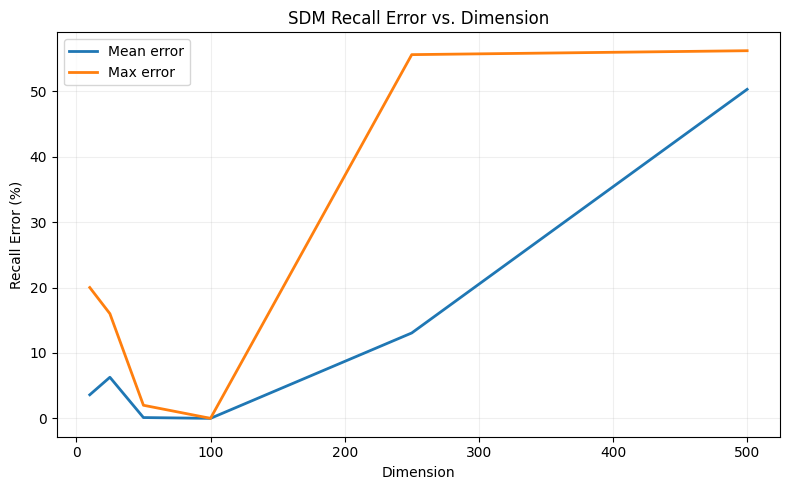

In [11]:
dimensions = [10, 25, 50, 100, 250, 500]
mean_errors = []
max_errors = []

# Outer loop over dimensions. 
for dim in tqdm(dimensions):
    SDM = KanervaSDM(
        address_dimension=dim,
        memory_dimension=dim,
        num_locations=dim**2,  
        activation_threshold=0.37*dim  # This activation threshold is best suited for dimension of 100. 
    )
    num_memories = 100

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = address.copy()
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories.
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors.
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(dimensions, mean_errors, linewidth=2, label="Mean error")
plt.plot(dimensions, max_errors, linewidth=2, label="Max error")
plt.xlabel("Dimension")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Dimension")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 2.5 Varying activation threshold

In this experiment: 
- Address and memory dimensions are equal, and they have a value of 100. 
- Address and memory vectors are the same. 
- Activation threshold is incremented from 0 to 100. 

This cell takes around thirty seconds (30s) to run. 

The outputted plot shows that for SDM with dimension 100, the optimal activation threshold is approximately 37. 
However, optimal activation threshold is not universally 0.37 times the dimension. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

***

100%|██████████| 100/100 [00:48<00:00,  2.08it/s]


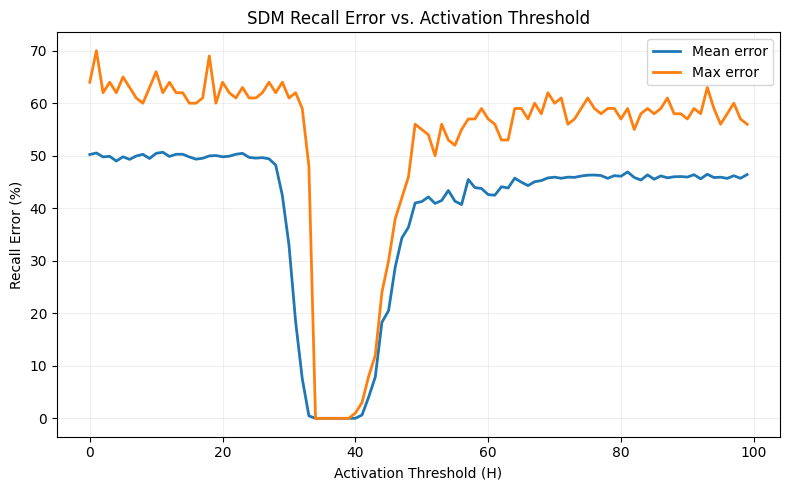

In [12]:
activation_thresholds = np.arange(0, 100, 1)
mean_errors = []
max_errors = []

# Outer loop over activation thresholds. 
for H in tqdm(activation_thresholds):
    SDM = KanervaSDM(
        address_dimension=100,
        memory_dimension=100,
        num_locations=10000,  
        activation_threshold=H
    )
    num_memories = 100

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories. 
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = address.copy()
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories. 
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors. 
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(activation_thresholds, mean_errors, linewidth=2, label="Mean error")
plt.plot(activation_thresholds, max_errors, linewidth=2, label="Max error")
plt.xlabel("Activation Threshold (H)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Activation Threshold")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 2.6 Varying number of hard locations

In this experiment: 
- Address and memory dimensions are equal, and they have a value of 100
- Address and memory vectors are the same. 
- Number of hard locations is incremented from 1 to 10000. 

This cell takes around thirty seconds (30s) to run. 

The outputted plot shows that increasing the number of hard locations decreases the error. Unfortunately, increasing the number of hard locations also increases the computational cost. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

***

100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


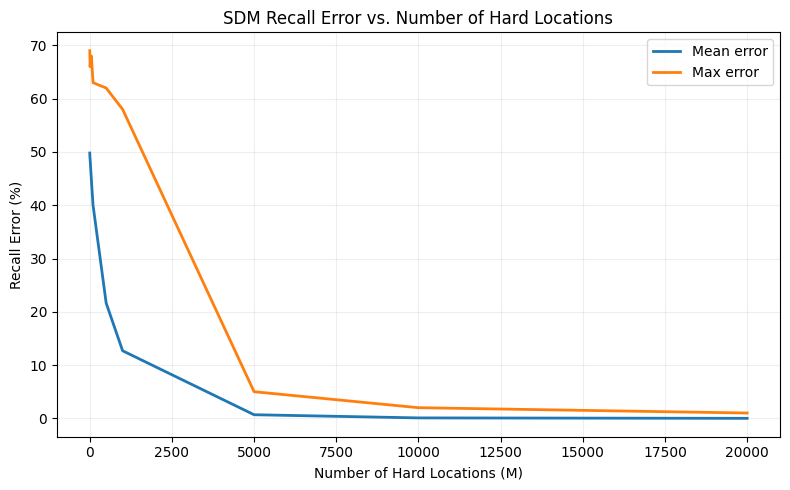

In [13]:
from tqdm import tqdm

num_locations = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 20000]
mean_errors = []
max_errors = []

# Outer loop over activation thresholds. 
for M in tqdm(num_locations):
    SDM = KanervaSDM(
        address_dimension=100,
        memory_dimension=100,
        num_locations=M,  
        activation_threshold=37
    )
    num_memories = 1000

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = address.copy()
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories. 
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors. 
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(num_locations, mean_errors, linewidth=2, label="Mean error")
plt.plot(num_locations, max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Hard Locations (M)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Hard Locations")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

## 3.0 Visualizing SDM 

Visualizations allow understanding the structure of address and memory vectors within SDM in a different way. However, because the matrices of SDM are very non-square, they need to be sliced (truncated) to fit in a normal image. For this reason, all of the visualizations in the experiments below will show 100x100 slices of SDM matrices, which have actual sizes of (100x10000) for a dimension of 100 and 10000 hard locations. 

***

### 3.1 Address and memory vectors that are different and both random

In this experiment: 
- The "standard" SDM configuration is used. 
- Address and memory vectors are different and randomly generated. 
- The number of stored memories is iterated from 1 to 10000 through multiplying by 10.  
- The SDM memory matrix is erased after each iteration, but the address matrix stays the same. 

This cell takes around thirty seconds (30s) to run. 

The output shows that as the number of stored memories increases, recall performance decreases (more error). The plots show that when there are few memories, only certain locations in the memory matrix are activated (seen as horizontal bands). The plots also show that as more memories are added, the memory matrix starts to look more and more like random noise. The increase of the memory matrix locations can also be seen, with larger memory matrix values occurring when there are more stored memories. 

***

Mean recall error: 0.00%.
Max recall error: 0.00%.


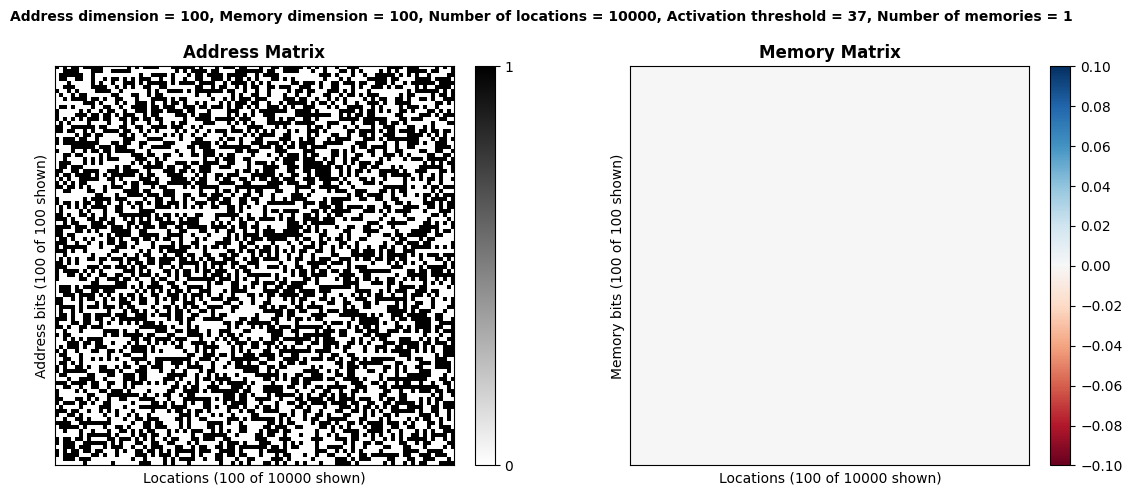

Mean recall error: 0.00%.
Max recall error: 0.00%.


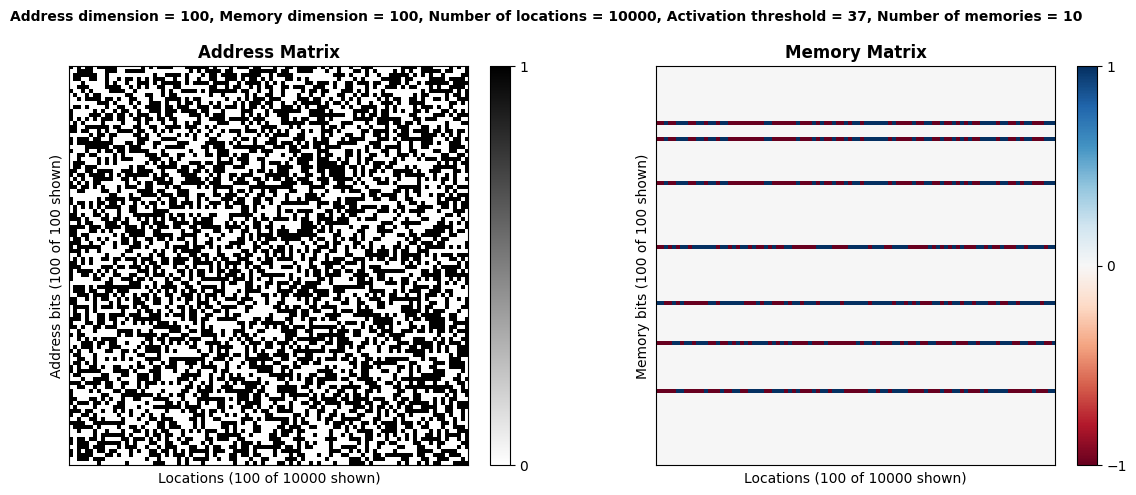

Mean recall error: 0.00%.
Max recall error: 0.00%.


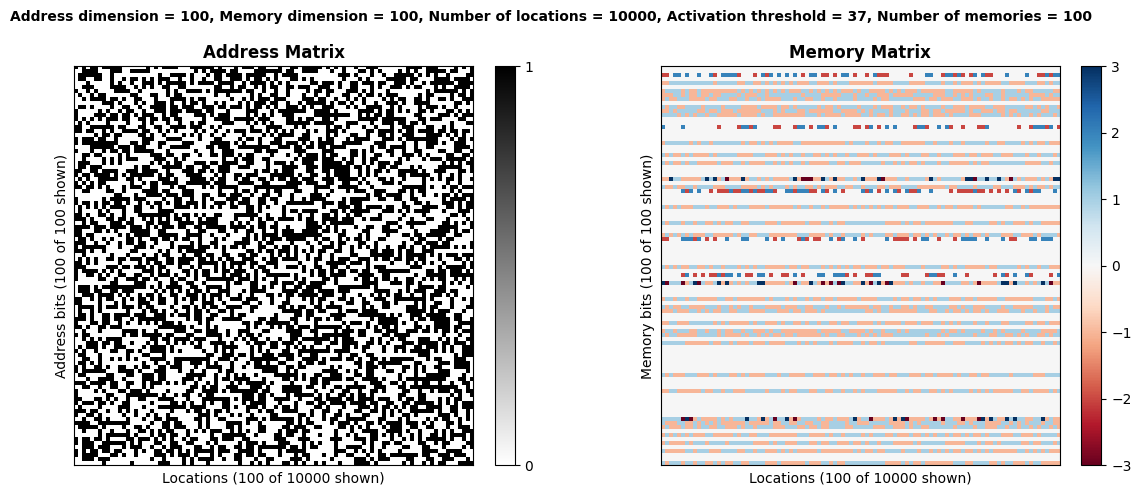

Mean recall error: 0.68%.
Max recall error: 6.00%.


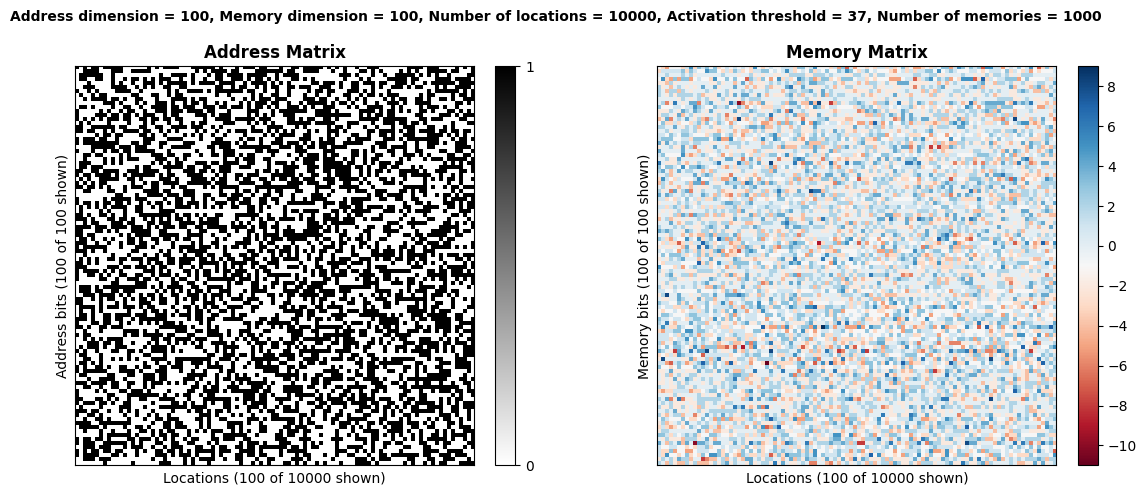

Mean recall error: 21.52%.
Max recall error: 37.00%.


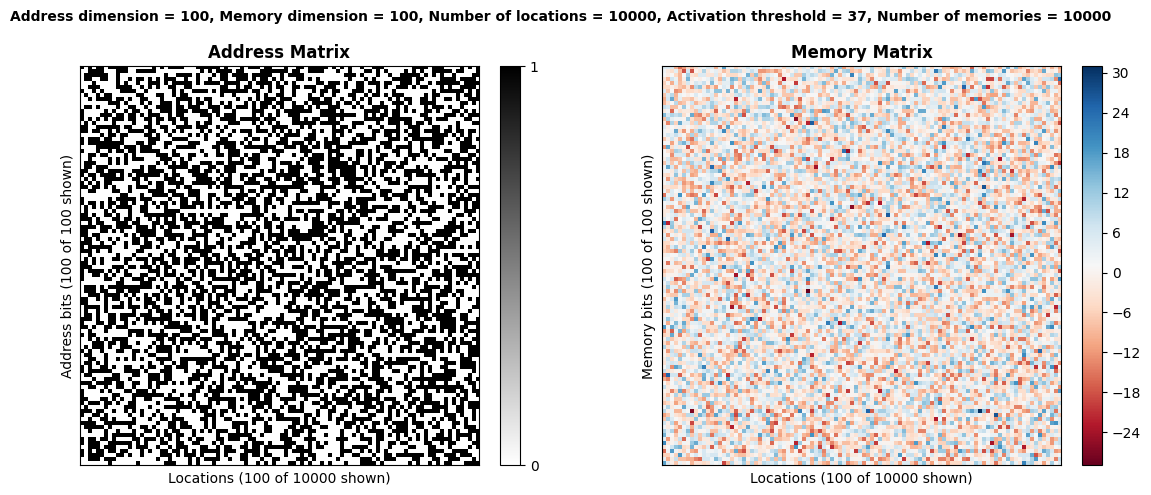

In [14]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

def visualize_matrices(sdm, slice_amount=100): 
    """Display both address and memory matrices in a single figure with parameters."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot address matrix (A). 
    im1 = ax1.imshow(sdm.address_matrix[:slice_amount, :slice_amount], cmap="binary", aspect="equal")
    ax1.set_title("Address Matrix", fontweight="bold")
    ax1.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax1.set_ylabel(f"Address bits ({slice_amount} of {sdm.address_dimension} shown)")
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Plot memory matrix (C). 
    im2 = ax2.imshow(sdm.memory_matrix[:slice_amount, :slice_amount], cmap="RdBu", aspect="equal")
    ax2.set_title("Memory Matrix", fontweight="bold")
    ax2.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax2.set_ylabel(f"Memory bits ({slice_amount} of {sdm.memory_dimension} shown)")
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.suptitle(f"Address dimension = {sdm.address_dimension}, " +
                 f"Memory dimension = {sdm.memory_dimension}, " + 
                 f"Number of locations = {sdm.num_locations}, " +
                 f"Activation threshold = {sdm.activation_threshold}, "+
                 f"Number of memories = {sdm.memory_count}", 
                 fontsize=10,
                 fontweight="bold"
    )
    cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

list_num_memories = [1, 10, 100, 1000, 10000]

def read_write_calculate(num_memories):
    # Create arrays for storing addresses and memories. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write all memories. 
    for i in range(num_memories): 
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.random.randint(0, 2, SDM.address_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)
        
    # Read all memories.  
    for i in range(num_memories): 
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory
        
    # Calcuate error.   
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
        
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension *100
    

    print(f"Mean recall error: {mean_error:.2f}%.")
    print(f"Max recall error: {max_error:.2f}%.")


for num_memories in list_num_memories:
    read_write_calculate(num_memories)
    visualize_matrices(SDM, 100)
    SDM.erase_memory()

### 3.2 Address and memory vectors that are the same and both random

In this experiment: 
- The "standard" SDM configuration is used. 
- Address and memory vectors are the same and randomly generated. 
- The number of stored memories is iterated from 1 to 10000 through multiplying by 10.  
- The SDM memory matrix is erased after each iteration, but the address matrix stays the same. 

This cell takes around thirty seconds (30s) to run. 

The output shows that as the number of stored memories increases, recall performance decreases (more error). The plots show that when there are few memories, only certain locations in the memory matrix are activated (seen as horizontal bands). The plots also show that as more memories are added, the memory matrix starts to look more and more like random noise. The increase of the memory matrix locations can also be seen, with larger memory matrix values occurring when there are more stored memories. 

Compared to the same experiment except with different address and memory vectors, this experiment exhibits much less error as memories are added. This could be because the memoires are very similar so they tend to reinforce each other. Also notable is that the memory matrix locations are higher in this experiment. This is a consequence of the memories representing the underlying memory structure since the address and memory vectors are identical. 

***

Mean recall error: 0.00%.
Max recall error: 0.00%.


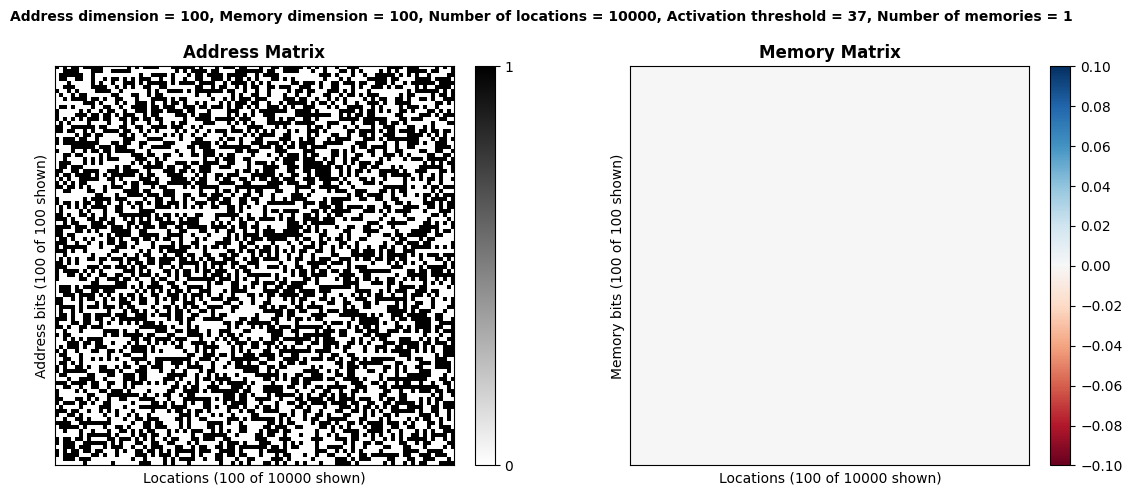

Mean recall error: 0.00%.
Max recall error: 0.00%.


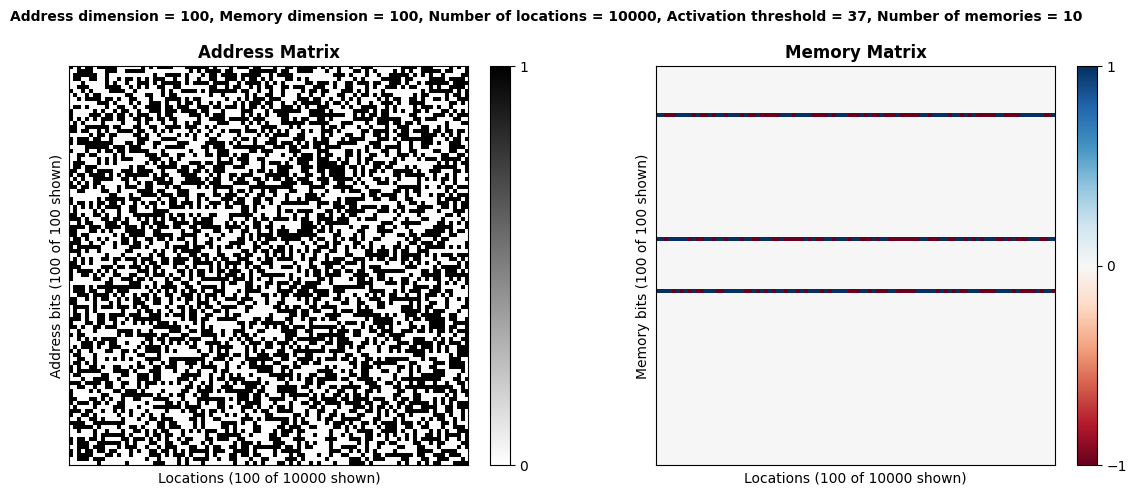

Mean recall error: 0.00%.
Max recall error: 0.00%.


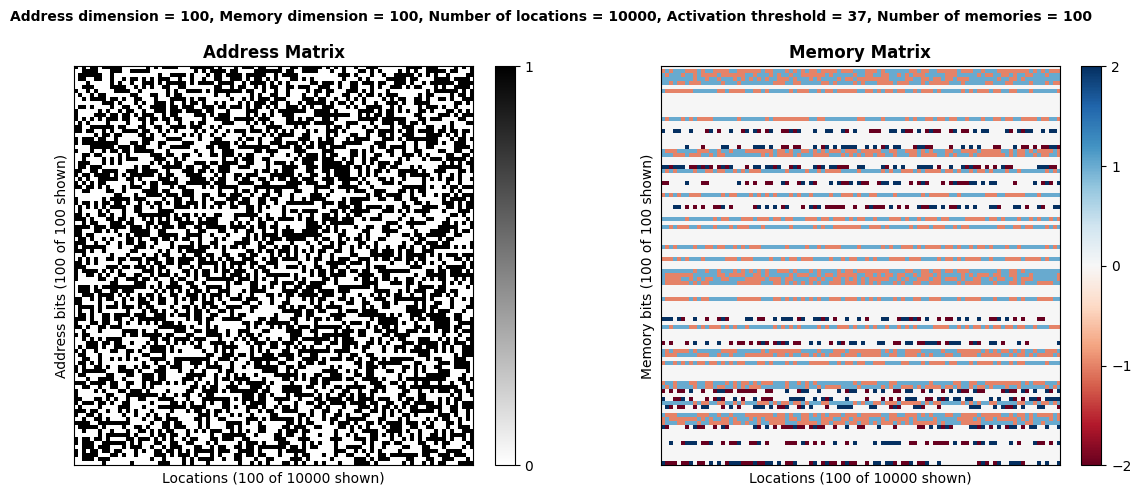

Mean recall error: 0.06%.
Max recall error: 2.00%.


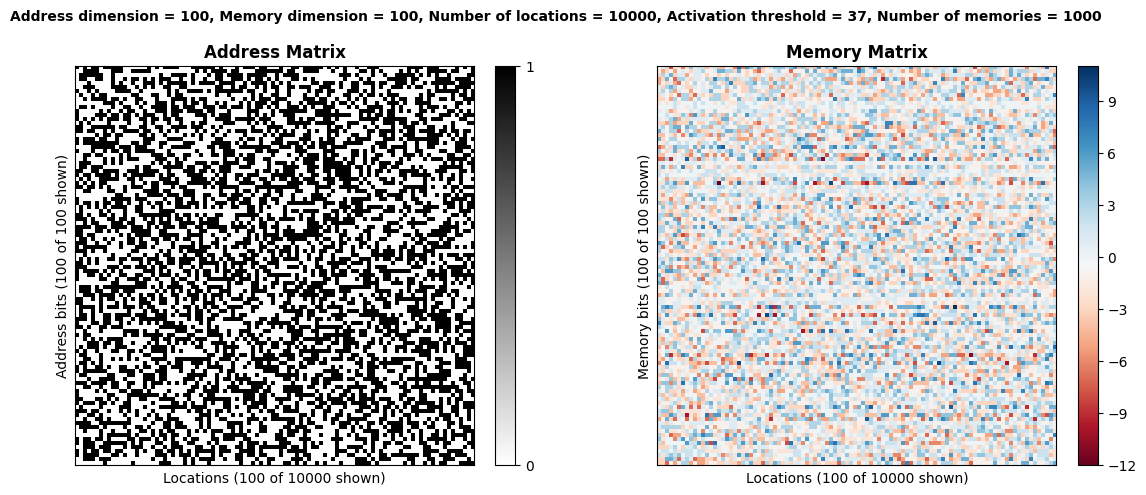

Mean recall error: 1.11%.
Max recall error: 8.00%.


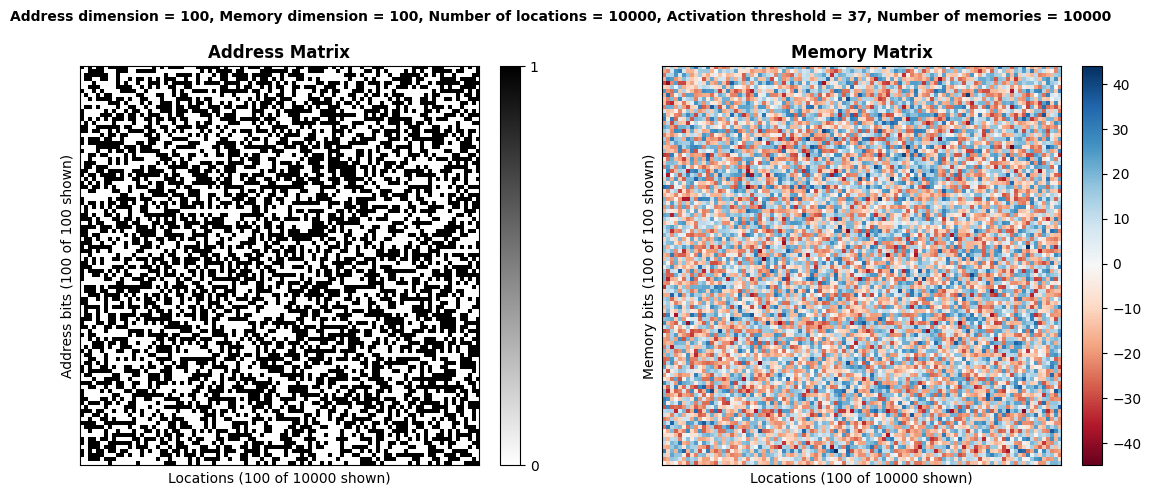

In [15]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

def visualize_matrices(sdm, slice_amount=100): 
    """Display both address and memory matrices in a single figure with parameters."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot address matrix (A). 
    im1 = ax1.imshow(sdm.address_matrix[:slice_amount, :slice_amount], cmap="binary", aspect="equal")
    ax1.set_title("Address Matrix", fontweight="bold")
    ax1.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax1.set_ylabel(f"Address bits ({slice_amount} of {sdm.address_dimension} shown)")
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Plot memory matrix (C). 
    im2 = ax2.imshow(sdm.memory_matrix[:slice_amount, :slice_amount], cmap="RdBu", aspect="equal")
    ax2.set_title("Memory Matrix", fontweight="bold")
    ax2.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax2.set_ylabel(f"Memory bits ({slice_amount} of {sdm.memory_dimension} shown)")
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.suptitle(f"Address dimension = {sdm.address_dimension}, " +
                 f"Memory dimension = {sdm.memory_dimension}, " + 
                 f"Number of locations = {sdm.num_locations}, " +
                 f"Activation threshold = {sdm.activation_threshold}, "+
                 f"Number of memories = {sdm.memory_count}", 
                 fontsize=10,
                 fontweight="bold"
    )
    cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

list_num_memories = [1, 10, 100, 1000, 10000]

def read_write_calculate(num_memories):
    # Create arrays for storing addresses and memories. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write all memories. 
    for i in range(num_memories): 
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = address.copy()
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)
        
    # Read all memories.  
    for i in range(num_memories): 
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory
        
    # Calcuate error.   
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
        
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension *100
    

    print(f"Mean recall error: {mean_error:.2f}%.")
    print(f"Max recall error: {max_error:.2f}%.")


for num_memories in list_num_memories:
    read_write_calculate(num_memories)
    visualize_matrices(SDM, 100)
    SDM.erase_memory()

### 3.3 Address and memory vectors that are different, with random addresses and non-random memories. 

In this experiment: 
- The "standard" SDM configuration is used. 
- Address and memory vectors are different. 
- Addresses are random. 
- Memories are not random, and are the padded binary representation of the memory number (memory #6 is representation as [..., 1, 1, 0]). 
- The number of stored memories is iterated from 1 to 10000 through multiplying by 10.  
- The SDM memory matrix is erased after each iteration, but the address matrix stays the same. 

This cell takes around thirty seconds (30s) to run. 

The outputted plots show that when memories are very similar to each other, some areas of the memory matrix are used much more than others. Since all the memory vectors stored in this experiment resembled [0 , 0 , ... , 0, 0, 1, 1, 1], only the bottom of the memory matrix contained positive values. Also, memory recall performance is better than the same experiment except with random memories.

***

Mean recall error: 0.00%.
Max recall error: 0.00%.


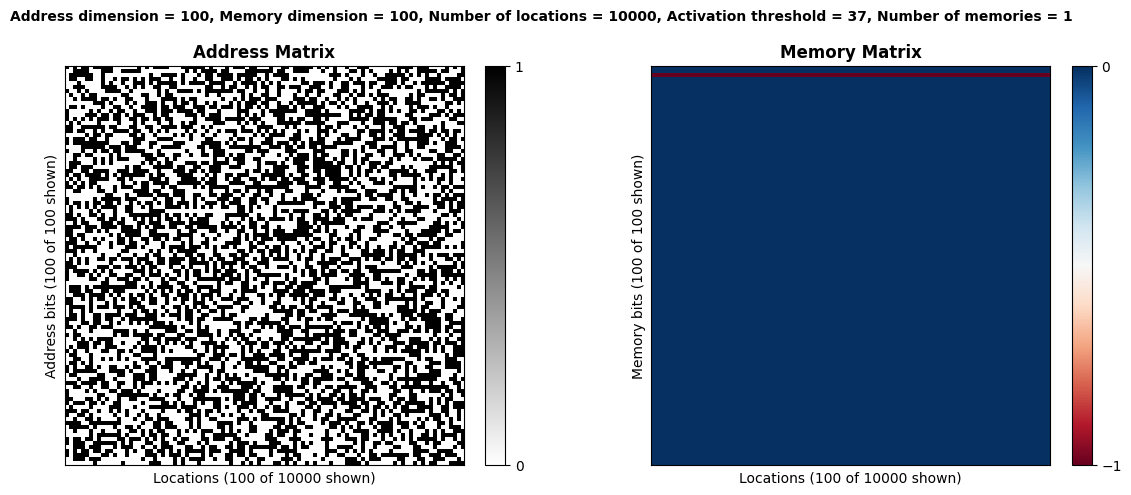

Mean recall error: 0.00%.
Max recall error: 0.00%.


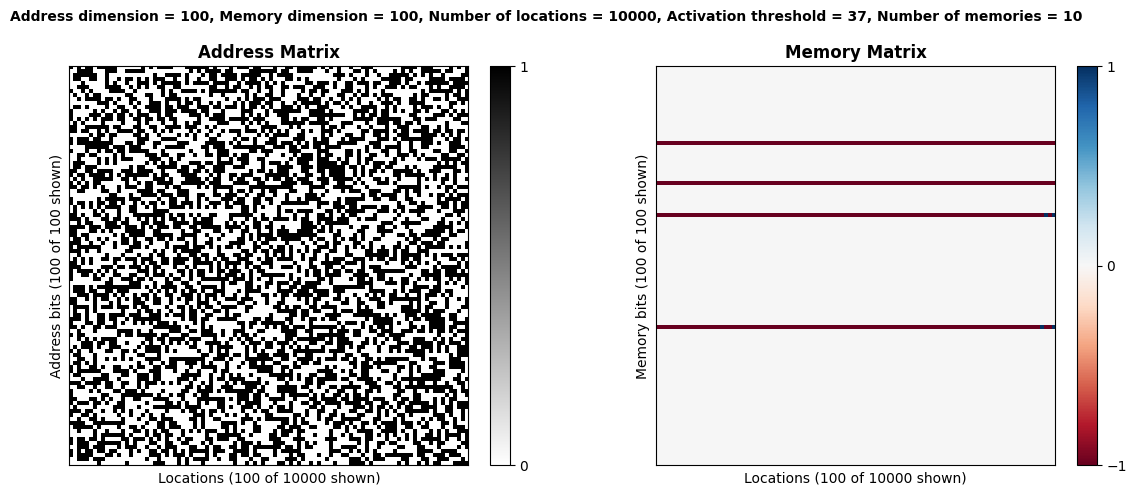

Mean recall error: 0.00%.
Max recall error: 0.00%.


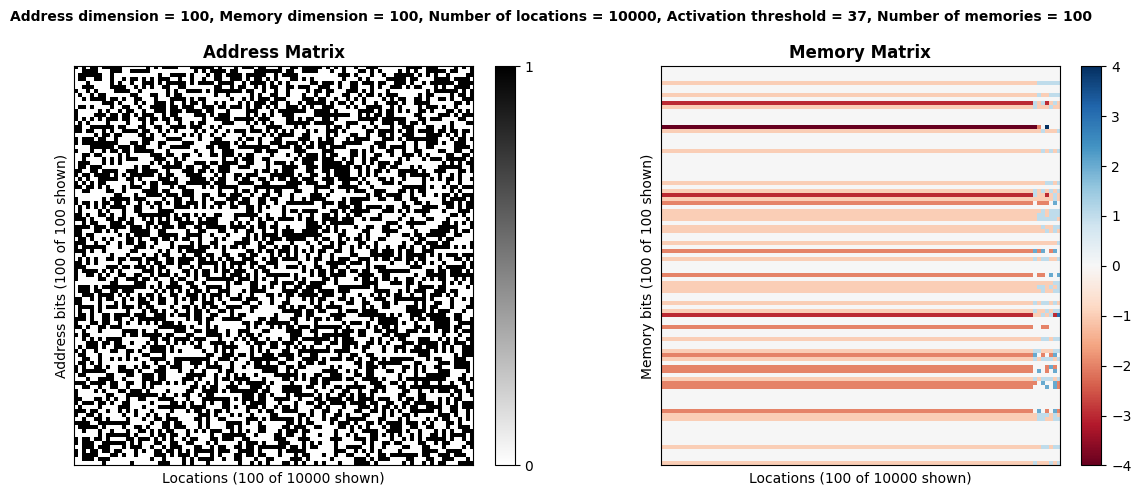

Mean recall error: 0.03%.
Max recall error: 2.00%.


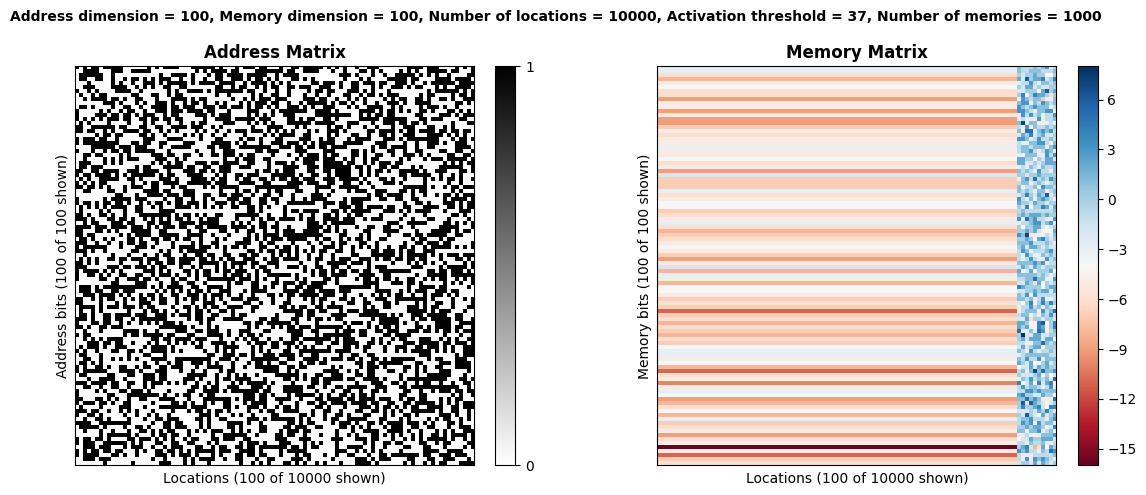

Mean recall error: 3.53%.
Max recall error: 10.00%.


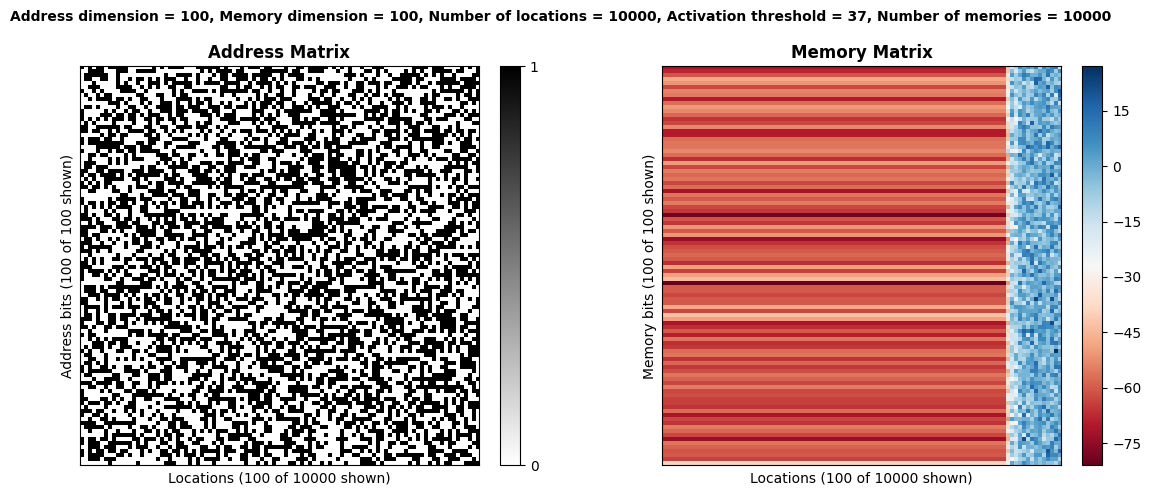

In [16]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

def visualize_matrices(sdm, slice_amount=100): 
    """Display both address and memory matrices in a single figure with parameters."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot address matrix (A). 
    im1 = ax1.imshow(sdm.address_matrix[:slice_amount, :slice_amount], cmap="binary", aspect="equal")
    ax1.set_title("Address Matrix", fontweight="bold")
    ax1.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax1.set_ylabel(f"Address bits ({slice_amount} of {sdm.address_dimension} shown)")
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Plot memory matrix (C). 
    im2 = ax2.imshow(sdm.memory_matrix[:slice_amount, :slice_amount], cmap="RdBu", aspect="equal")
    ax2.set_title("Memory Matrix", fontweight="bold")
    ax2.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax2.set_ylabel(f"Memory bits ({slice_amount} of {sdm.memory_dimension} shown)")
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.suptitle(f"Address dimension = {sdm.address_dimension}, " +
                 f"Memory dimension = {sdm.memory_dimension}, " + 
                 f"Number of locations = {sdm.num_locations}, " +
                 f"Activation threshold = {sdm.activation_threshold}, "+
                 f"Number of memories = {sdm.memory_count}", 
                 fontsize=10,
                 fontweight="bold"
    )
    cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

list_num_memories = [1, 10, 100, 1000, 10000]

def read_write_calculate(num_memories):
    # Create arrays for storing addresses and memories. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write all memories. 
    for i in range(num_memories): 
        binary_str = format(i, f"0{SDM.address_dimension}b")  # Pad binary string to match dimension. 
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.array([int(bit) for bit in binary_str], dtype=int)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)
        
    # Read all memories.  
    for i in range(num_memories): 
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory
        
    # Calcuate error.   
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
        
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension *100
    

    print(f"Mean recall error: {mean_error:.2f}%.")
    print(f"Max recall error: {max_error:.2f}%.")


for num_memories in list_num_memories:
    read_write_calculate(num_memories)
    visualize_matrices(SDM, 100)
    SDM.erase_memory()

### 3.4 Address and memory vectors that are different, with non-random addresses and random memories. 

In this experiment: 
- The "standard" SDM configuration is used. 
- Address and memory vectors are different. 
- Addresses are not random, and are the padded binary representation of the memory number (memory #6 is representation as [..., 1, 1, 0]). 
- Memories are random.
- The number of stored memories is iterated from 1 to 10000 through multiplying by 10.  
- The SDM memory matrix is erased after each iteration, but the address matrix stays the same. 

This cell takes around thirty seconds (30s) to run. 

The outputted plots show that when addresses are very similar to each other, only certain hard locations are used. This causes the memory matrix locations to reach very high numbers. Also, memory recall performance is far worse than with random addresses and non-random memories. 
***

Mean recall error: 0.00%.
Max recall error: 0.00%.


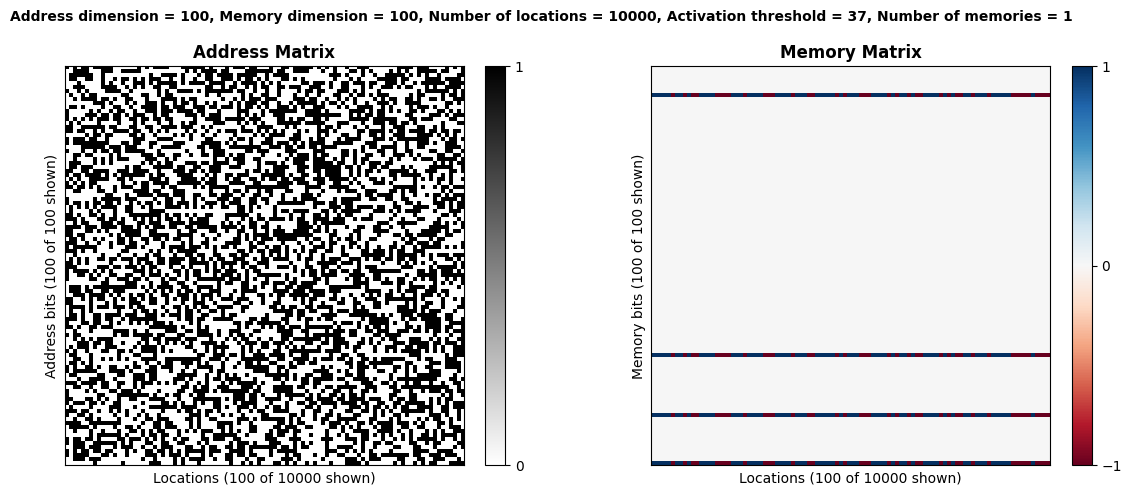

Mean recall error: 27.40%.
Max recall error: 35.00%.


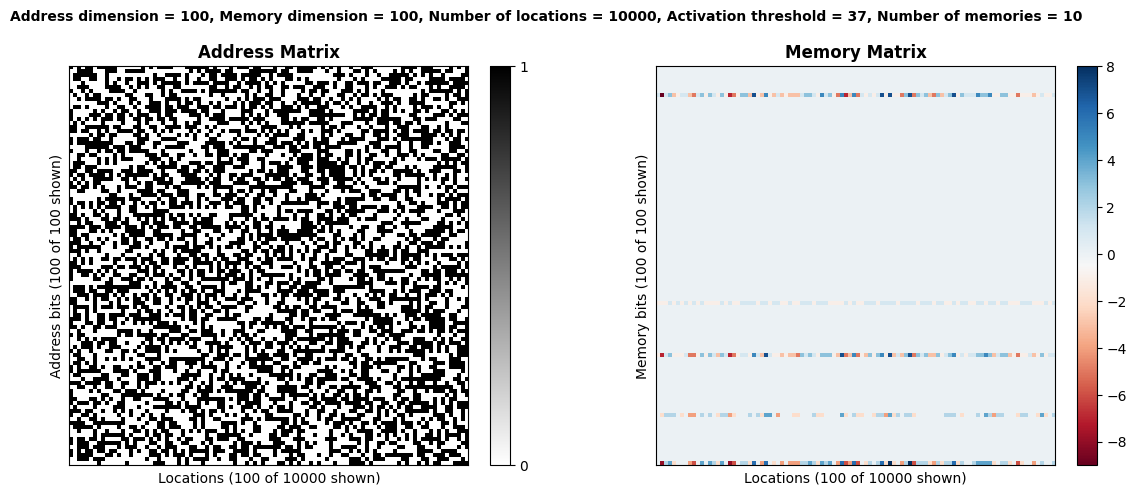

Mean recall error: 43.62%.
Max recall error: 59.00%.


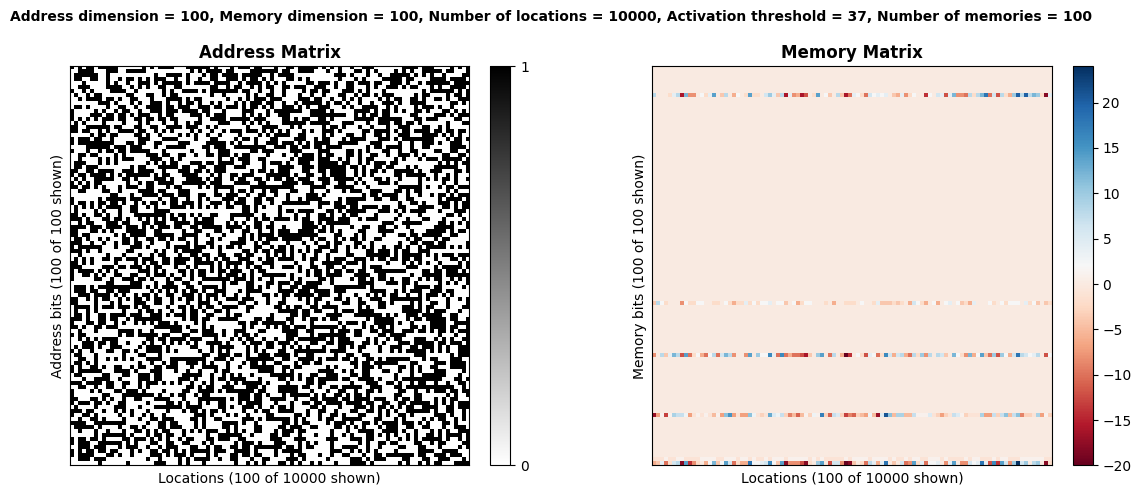

Mean recall error: 47.59%.
Max recall error: 64.00%.


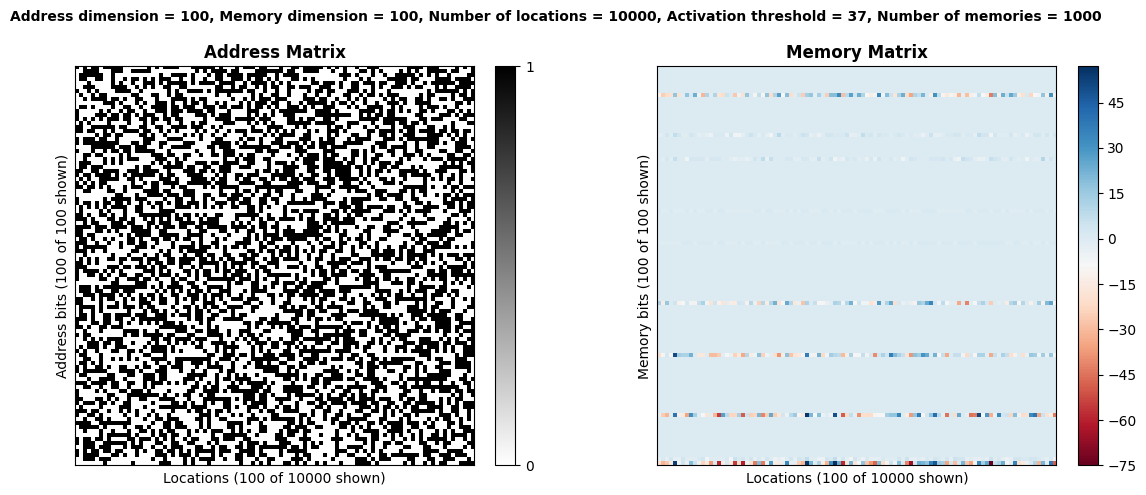

Mean recall error: 49.22%.
Max recall error: 67.00%.


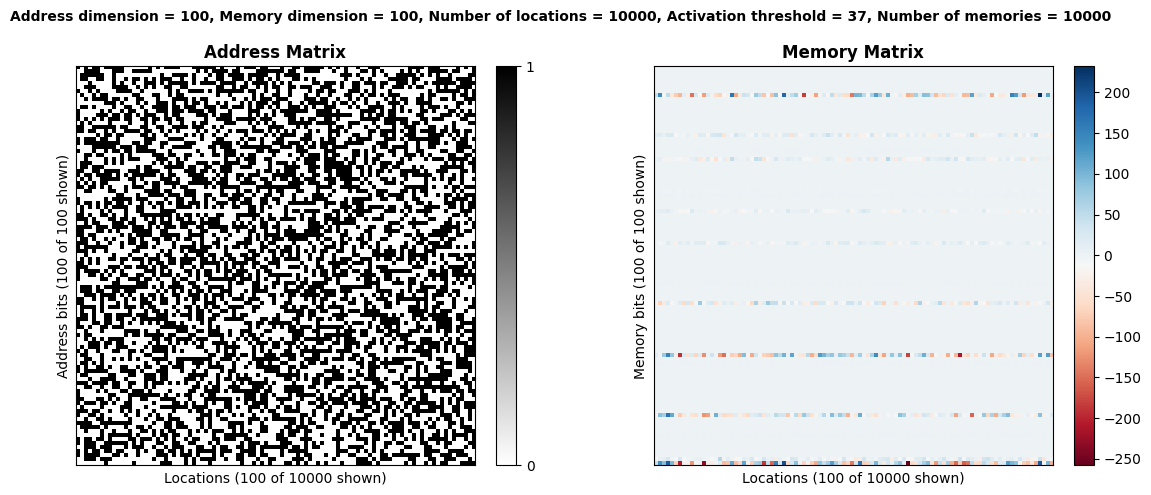

In [17]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

def visualize_matrices(sdm, slice_amount=100): 
    """Display both address and memory matrices in a single figure with parameters."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot address matrix (A). 
    im1 = ax1.imshow(sdm.address_matrix[:slice_amount, :slice_amount], cmap="binary", aspect="equal")
    ax1.set_title("Address Matrix", fontweight="bold")
    ax1.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax1.set_ylabel(f"Address bits ({slice_amount} of {sdm.address_dimension} shown)")
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Plot memory matrix (C). 
    im2 = ax2.imshow(sdm.memory_matrix[:slice_amount, :slice_amount], cmap="RdBu", aspect="equal")
    ax2.set_title("Memory Matrix", fontweight="bold")
    ax2.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax2.set_ylabel(f"Memory bits ({slice_amount} of {sdm.memory_dimension} shown)")
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.suptitle(f"Address dimension = {sdm.address_dimension}, " +
                 f"Memory dimension = {sdm.memory_dimension}, " + 
                 f"Number of locations = {sdm.num_locations}, " +
                 f"Activation threshold = {sdm.activation_threshold}, "+
                 f"Number of memories = {sdm.memory_count}", 
                 fontsize=10,
                 fontweight="bold"
    )
    cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

list_num_memories = [1, 10, 100, 1000, 10000]

def read_write_calculate(num_memories):
    # Create arrays for storing addresses and memories. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write all memories. 
    for i in range(num_memories): 
        binary_str = format(i, f"0{SDM.address_dimension}b")  # Pad binary string to match dimension. 
        address = np.array([int(bit) for bit in binary_str], dtype=int)
        memory = np.random.randint(0, 2, SDM.address_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)
        
    # Read all memories.  
    for i in range(num_memories): 
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory
        
    # Calcuate error.   
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
        
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension *100
    

    print(f"Mean recall error: {mean_error:.2f}%.")
    print(f"Max recall error: {max_error:.2f}%.")


for num_memories in list_num_memories:
    read_write_calculate(num_memories)
    visualize_matrices(SDM, 100)
    SDM.erase_memory()

### 3.5 Address and memory vectors that are different and both non-random

In this experiment: 
- The "standard" SDM configuration is used. 
- Address and memory vectors are different. 
- Addresses and memories are both not random, and are the padded binary representation of the memory number (memory #6 is representation as [..., 1, 1, 0]). 
- The number of stored memories is iterated from 1 to 10000 through multiplying by 10.   
- The SDM memory matrix is erased after each iteration, but the address matrix stays the same. 

This cell takes around thirty seconds (30s) to run. 

The outputted plots show that when addresses and memories are very similar to each other, the same hard locations are used to store memories that are very similar. Since all the memory vectors stored in this experiment resembled [0 , 0 , ... , 0, 0, 1, 1, 1], containing mostly zeroes, when they are converted to binary they cause certain locations in the mory matrix to become very negative. 

***

Mean recall error: 0.00%.
Max recall error: 0.00%.


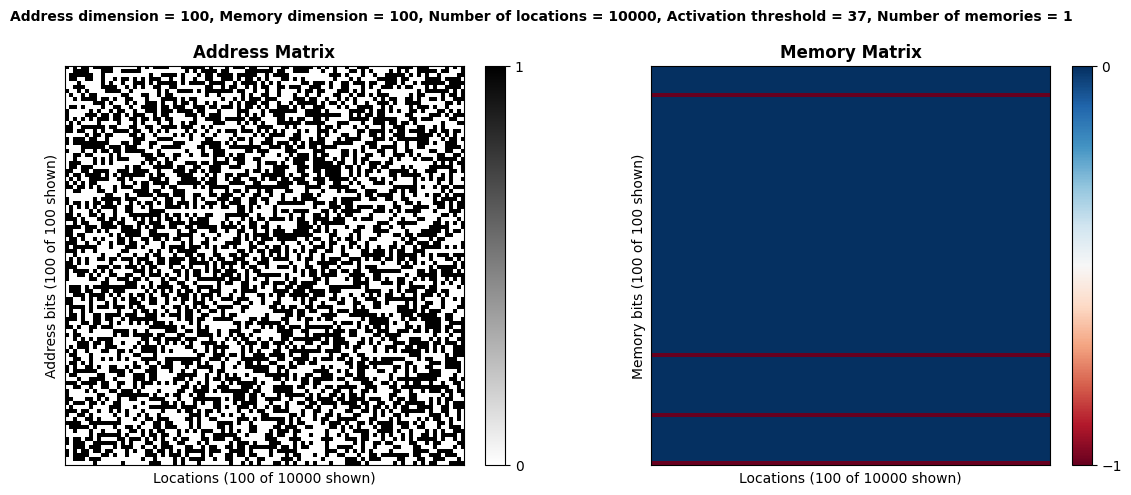

Mean recall error: 1.20%.
Max recall error: 3.00%.


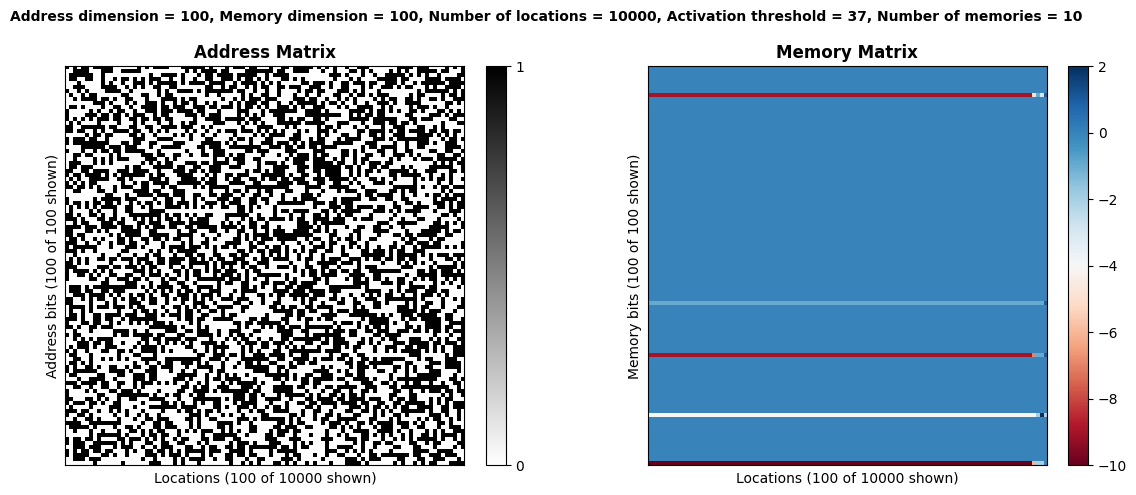

Mean recall error: 1.10%.
Max recall error: 3.00%.


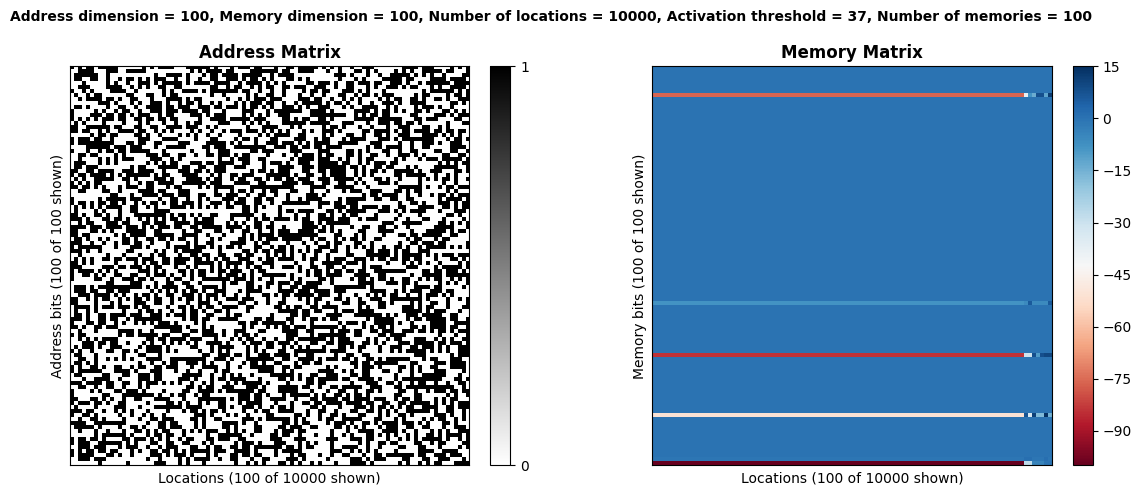

Mean recall error: 0.95%.
Max recall error: 3.00%.


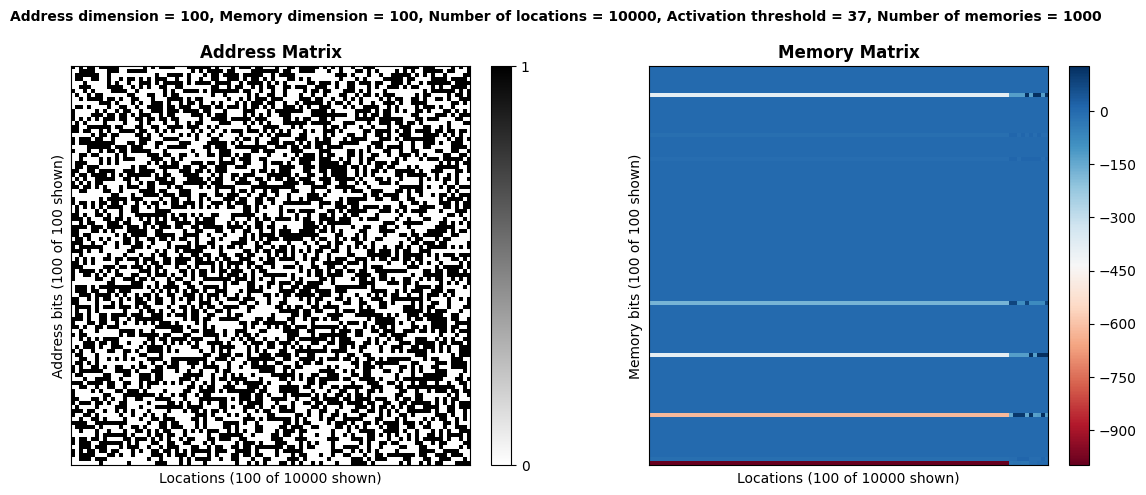

Mean recall error: 1.85%.
Max recall error: 6.00%.


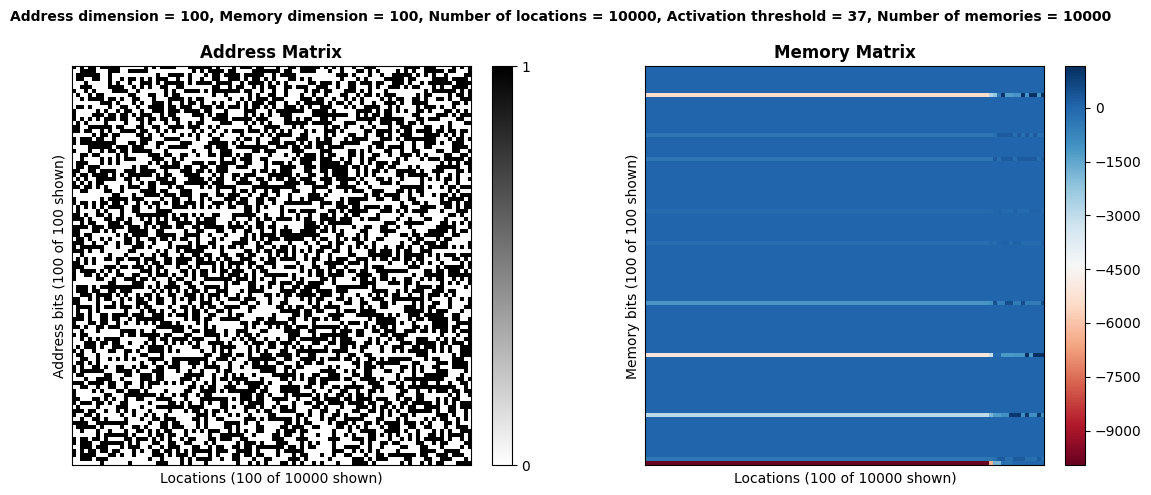

In [18]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

def visualize_matrices(sdm, slice_amount=100): 
    """Display both address and memory matrices in a single figure with parameters."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot address matrix (A). 
    im1 = ax1.imshow(sdm.address_matrix[:slice_amount, :slice_amount], cmap="binary", aspect="equal")
    ax1.set_title("Address Matrix", fontweight="bold")
    ax1.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax1.set_ylabel(f"Address bits ({slice_amount} of {sdm.address_dimension} shown)")
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Plot memory matrix (C). 
    im2 = ax2.imshow(sdm.memory_matrix[:slice_amount, :slice_amount], cmap="RdBu", aspect="equal")
    ax2.set_title("Memory Matrix", fontweight="bold")
    ax2.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax2.set_ylabel(f"Memory bits ({slice_amount} of {sdm.memory_dimension} shown)")
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.suptitle(f"Address dimension = {sdm.address_dimension}, " +
                 f"Memory dimension = {sdm.memory_dimension}, " + 
                 f"Number of locations = {sdm.num_locations}, " +
                 f"Activation threshold = {sdm.activation_threshold}, "+
                 f"Number of memories = {sdm.memory_count}", 
                 fontsize=10,
                 fontweight="bold"
    )
    cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

list_num_memories = [1, 10, 100, 1000, 10000]

def read_write_calculate(num_memories):
    # Create arrays for storing addresses and memories. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write all memories. 
    for i in range(num_memories): 
        binary_str = format(i, f"0{SDM.address_dimension}b")  # Pad binary string to match dimension. 
        address = np.array([int(bit) for bit in binary_str], dtype=int)
        memory = address.copy()
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)
        
    # Read all memories.  
    for i in range(num_memories): 
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory
        
    # Calcuate error.   
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
        
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension *100
    

    print(f"Mean recall error: {mean_error:.2f}%.")
    print(f"Max recall error: {max_error:.2f}%.")


for num_memories in list_num_memories:
    read_write_calculate(num_memories)
    visualize_matrices(SDM, 100)
    SDM.erase_memory()

### 3.6 Chaining addresses and memories 

In this experiment: 
- The "standard" SDM configuration is used. 
- Each memory is the address of the subsequent memory (they are chained), and the address/memory vectors are random. 
- The number of stored memories is iterated from 1 to 10000 through multiplying by 10.   
- The SDM memory matrix is erased after each iteration, but the address matrix stays the same. 

This cell takes around thirty seconds (30s) to run. 

The output of this experiment shows worse performance than when address and memory vectors are different, random, and unrelated to each other. This makes sense since in this experiment the correct recall of a given memory depends on every memory preceding it. 

***

Mean recall error: 0.00%.
Max recall error: 0.00%.


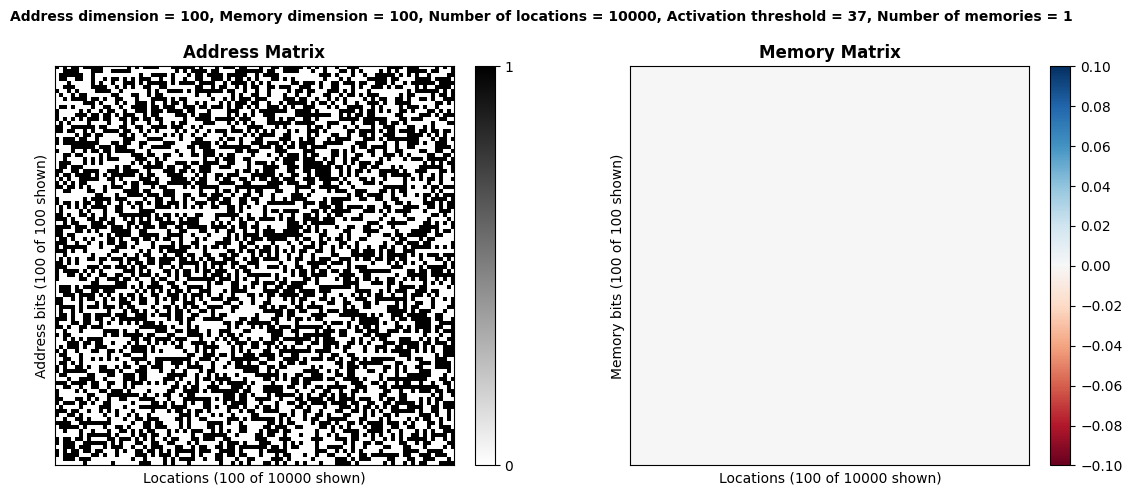

Mean recall error: 0.00%.
Max recall error: 0.00%.


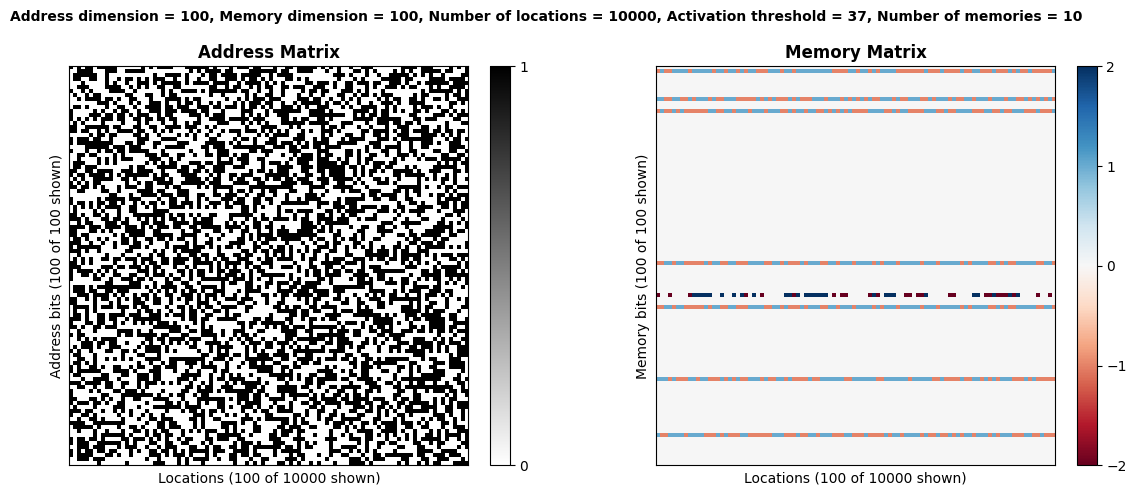

Mean recall error: 0.00%.
Max recall error: 0.00%.


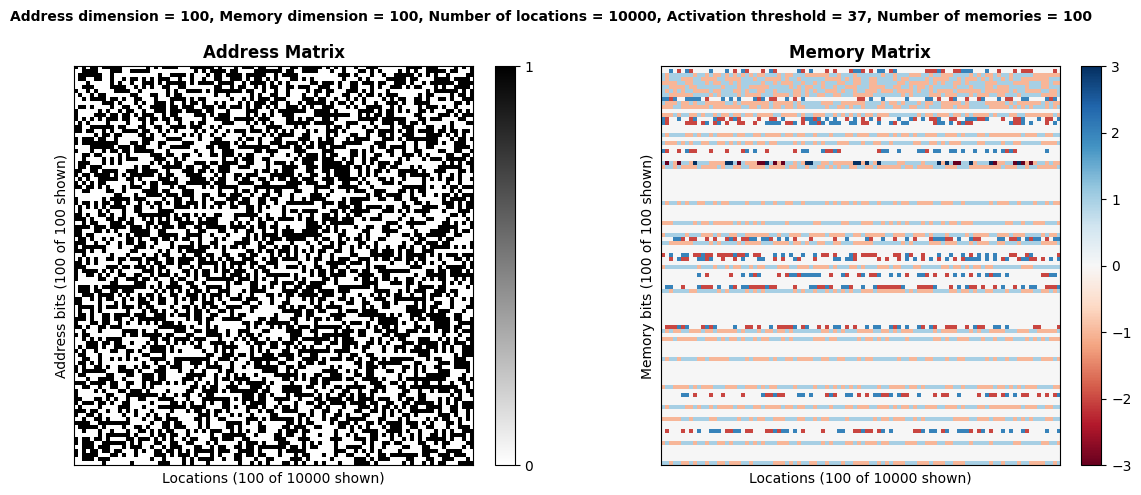

Mean recall error: 0.67%.
Max recall error: 4.00%.


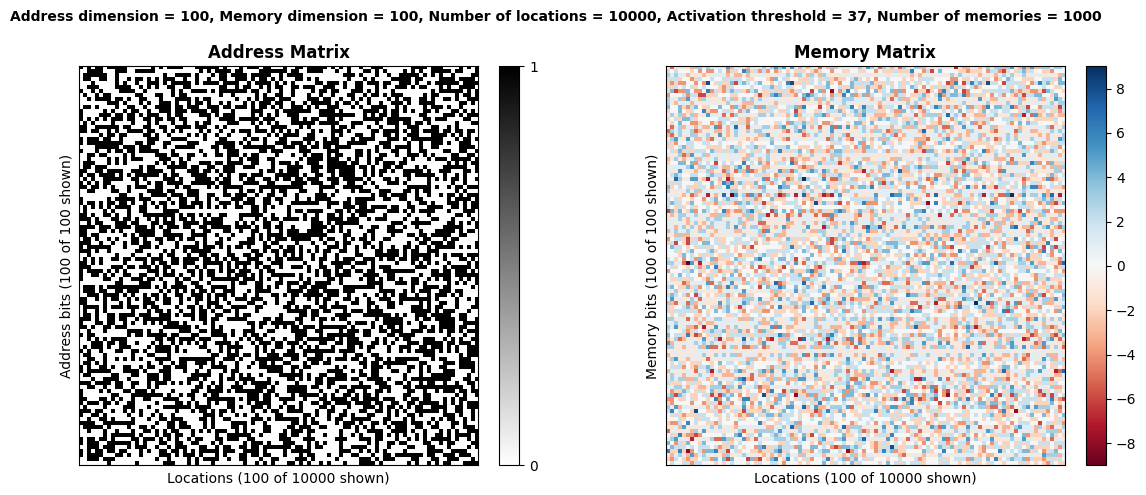

Mean recall error: 21.92%.
Max recall error: 40.00%.


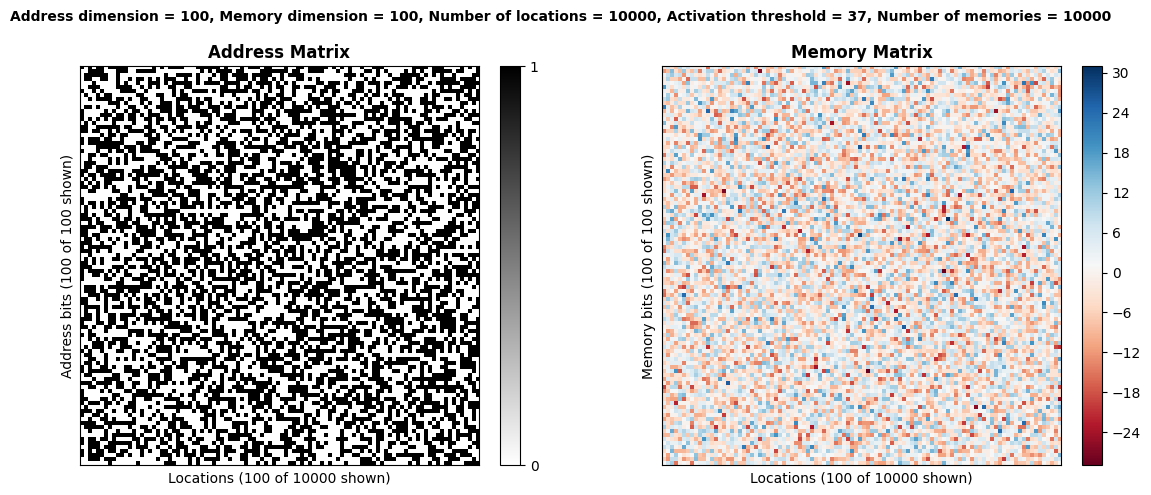

In [19]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

def visualize_matrices(sdm, slice_amount=100): 
    """Display both address and memory matrices in a single figure with parameters."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot address matrix (A). 
    im1 = ax1.imshow(sdm.address_matrix[:slice_amount, :slice_amount], cmap="binary", aspect="equal")
    ax1.set_title("Address Matrix", fontweight="bold")
    ax1.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax1.set_ylabel(f"Address bits ({slice_amount} of {sdm.address_dimension} shown)")
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Plot memory matrix (C). 
    im2 = ax2.imshow(sdm.memory_matrix[:slice_amount, :slice_amount], cmap="RdBu", aspect="equal")
    ax2.set_title("Memory Matrix", fontweight="bold")
    ax2.set_xlabel(f"Locations ({slice_amount} of {sdm.num_locations} shown)")
    ax2.set_ylabel(f"Memory bits ({slice_amount} of {sdm.memory_dimension} shown)")
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.suptitle(f"Address dimension = {sdm.address_dimension}, " +
                 f"Memory dimension = {sdm.memory_dimension}, " + 
                 f"Number of locations = {sdm.num_locations}, " +
                 f"Activation threshold = {sdm.activation_threshold}, "+
                 f"Number of memories = {sdm.memory_count}", 
                 fontsize=10,
                 fontweight="bold"
    )
    cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

list_num_memories = [1, 10, 100, 1000, 10000]

def read_write_calculate(num_memories):
    # Create arrays for storing addresses and memories. 
    addresses = np.empty((num_memories+1, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Generate all random addresses first.
    for i in range(num_memories+1):
        addresses[i] = np.random.randint(0, 2, size=SDM.address_dimension)
    
    # Write all memories. 
    for i in range(num_memories): 
        address = addresses[i]
        memory = addresses[i+1]
        memories[i] = memory
        SDM.write(address, memory)
        
    # Read all memories.  
    for i in range(num_memories): 
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory
        
    # Calcuate error.   
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
        
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension *100
    

    print(f"Mean recall error: {mean_error:.2f}%.")
    print(f"Max recall error: {max_error:.2f}%.")


for num_memories in list_num_memories:
    read_write_calculate(num_memories)
    visualize_matrices(SDM, 100)
    SDM.erase_memory()

## 4.0 Storing images of numerals in SDM

In this section, 10x10 images (matrices) of Roman numerals are flattened to 100-element vector, then stored to and recalled from SDM. 

***

### 4.1 Storing images of numerals in SDM and adding random memories

In this experiment: 
- The "standard" SDM configuration is used. 
- Each numeral memory vector is a flattened 10x10 matrix representing a numeral (one to six). 
- The address of each numeral memory is randomly generated
- A certain number of random memories are written to the SDM, and then the numerals are read from their original addresses. 

This experiment shows how memories can decay as more new memories are stored. This experiment is also an example of using SDM to store data that is somewhat applicable to real-world uses cases. 

***

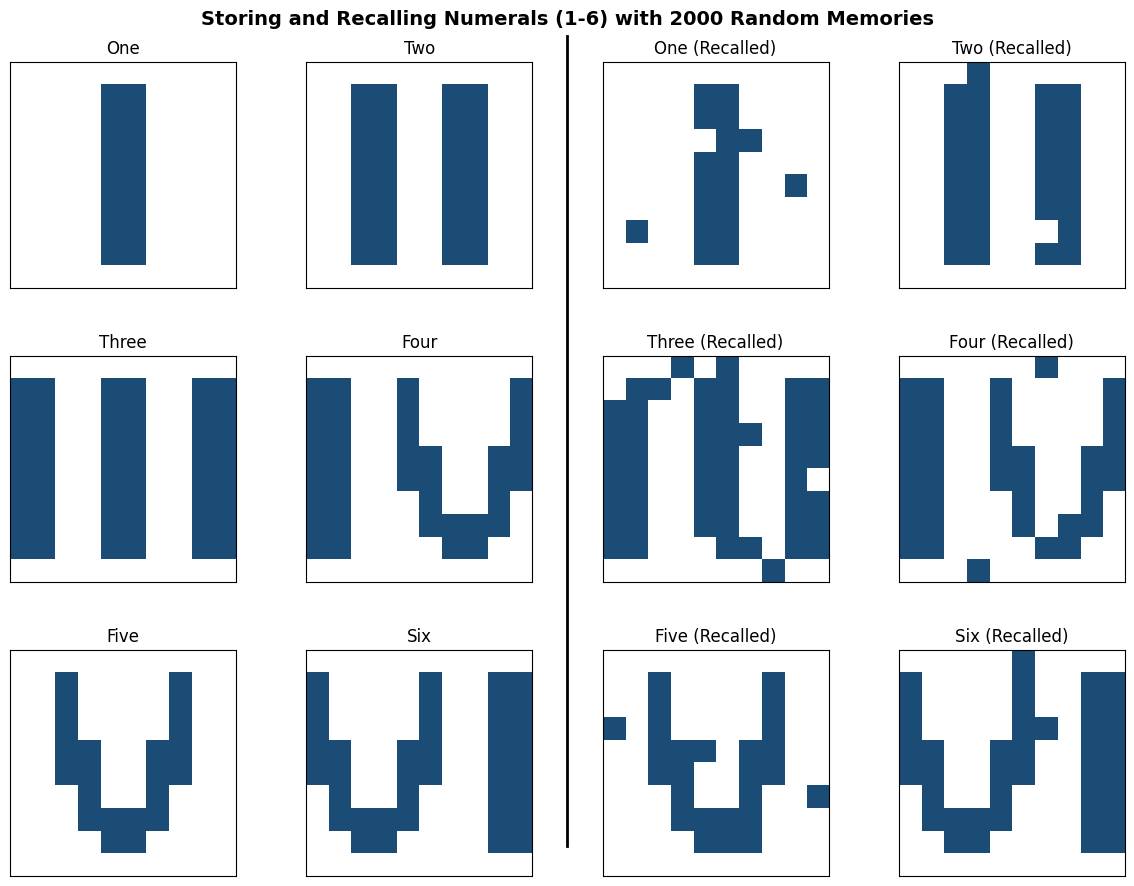

In [20]:
# Numerals class contains binary 10x10 matrices representing images of Roman numerals from one to six. 
class Numerals:  
    def __init__(self):
        self.one = np.zeros((10, 10))
        self.one[1:9, 4:6] = 1

        self.two = np.zeros((10, 10))
        self.two[1:9, 2:4] = 1
        self.two[1:9, 6:8] = 1

        self.three = np.zeros((10, 10))
        self.three[1:9, 0:2] = 1
        self.three[1:9, 4:6] = 1
        self.three[1:9, 8:10] = 1

        self.four = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 
                              [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 
                              [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                              [1, 1, 0, 0, 0, 1, 1, 1, 1, 0], 
                              [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                              ])

        self.five = np.zeros((10, 10))
        self.five[:, 2:8] += self.four[:, 4:10]

        self.six = self.four[:, ::-1]
    
    # Store all numerals in a list for easy iteration. 
        self.all = [self.one, self.two, self.three, self.four, self.five, self.six]
    
    def __len__(self):
        return len(self.all)
    
    def __getitem__(self, index):
        return self.all[index]

SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

numerals = Numerals()

def store_numerals(times=1): 
    memories = []
    for numeral in numerals: 
        memories.append(numeral.flatten())

    addresses = []
    for i in range(len(memories)): 
        addresses.append(np.random.randint(0, 2, size=SDM.address_dimension))

    # Write numerals to SDM more than once. 
    for t in range(times): 
        for address, memory in zip(addresses, memories): 
            SDM.write(address, memory)

    return addresses

def recall_numerals(addresses): 
    recalled_memories = []
    for i, address in enumerate(addresses): 
        recalled_memory = SDM.read(address)
        recalled_memories.append(recalled_memory)
        numeral = recalled_memory.reshape((10, 10))
    return [memory.reshape((10, 10)) for memory in recalled_memories]

def write_random_memories(amount): 
    for i in range(amount): 
        address = np.random.randint(0, 2, size=SDM.address_dimension)
        memory = np.random.randint(0, 2, size=SDM.address_dimension)
        SDM.write(address, memory)

def visualize_original_and_recalled(numerals, recalled_numerals):
    names = ["One", "Two", "Three", "Four", "Five", "Six"]
    
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    
    # Create custom colormap: white to navy blue
    from matplotlib.colors import LinearSegmentedColormap
    colors = ['white', '#1a4c75']  # navy blue
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('navy', colors, N=n_bins)
    
    # Row 1: numerals 1-2
    for i in range(2):
        # Original on left
        axes[0, i].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[0, i].set_title(f"{names[i]}")
        axes[0, i].set_xticks([])
        axes[0, i].set_yticks([])
        
        # Recalled on right
        axes[0, i + 2].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[0, i + 2].set_title(f"{names[i]} (Recalled)")
        axes[0, i + 2].set_xticks([])
        axes[0, i + 2].set_yticks([])
    
    # Row 2: numerals 3-4
    for i in range(2, 4):
        # Original on left
        axes[1, i - 2].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[1, i - 2].set_title(f"{names[i]}")
        axes[1, i - 2].set_xticks([])
        axes[1, i - 2].set_yticks([])
        
        # Recalled on right
        axes[1, i].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[1, i].set_title(f"{names[i]} (Recalled)")
        axes[1, i].set_xticks([])
        axes[1, i].set_yticks([])
    
    # Row 3: numerals 5-6
    for i in range(4, 6):
        # Original on left
        axes[2, i - 4].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[2, i - 4].set_title(f"{names[i]}")
        axes[2, i - 4].set_xticks([])
        axes[2, i - 4].set_yticks([])
        
        # Recalled on right
        axes[2, i - 2].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[2, i - 2].set_title(f"{names[i]} (Recalled)")
        axes[2, i - 2].set_xticks([])
        axes[2, i - 2].set_yticks([])
    
    plt.suptitle(f"Storing and Recalling Numerals (1-6) with 2000 Random Memories", 
                 fontweight="bold",
                 fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)
    
    # Add vertical black line between original and recalled columns
    fig.add_artist(plt.Line2D([0.5, 0.5], [0.05, 0.95], 
                              transform=fig.transFigure, 
                              color='black', 
                              linewidth=2))
    
    plt.show()

addresses = store_numerals()
write_random_memories(2000)
recalled_numerals = recall_numerals(addresses)
visualize_original_and_recalled(numerals, recalled_numerals)

### 4.2 Storing images of numerals in SDM and corrupting the memory addresses. 

In this experiment: 
- The "standard" SDM configuration is used. 
- Each numeral memory vector is a flattened 10x10 matrix representing a numeral (one to six). 
- The address of each numeral memory is randomly generated
- A certain fraction of the address bits are flipped. 

This experiment shows how memories may be incorrectly recalled if their address is damaged. It also shows how memories in SDM are connected to each other, with the recalled numerals sometimes being fully intact, but incorrect (e.g. five is recalled in the place of six). 

***

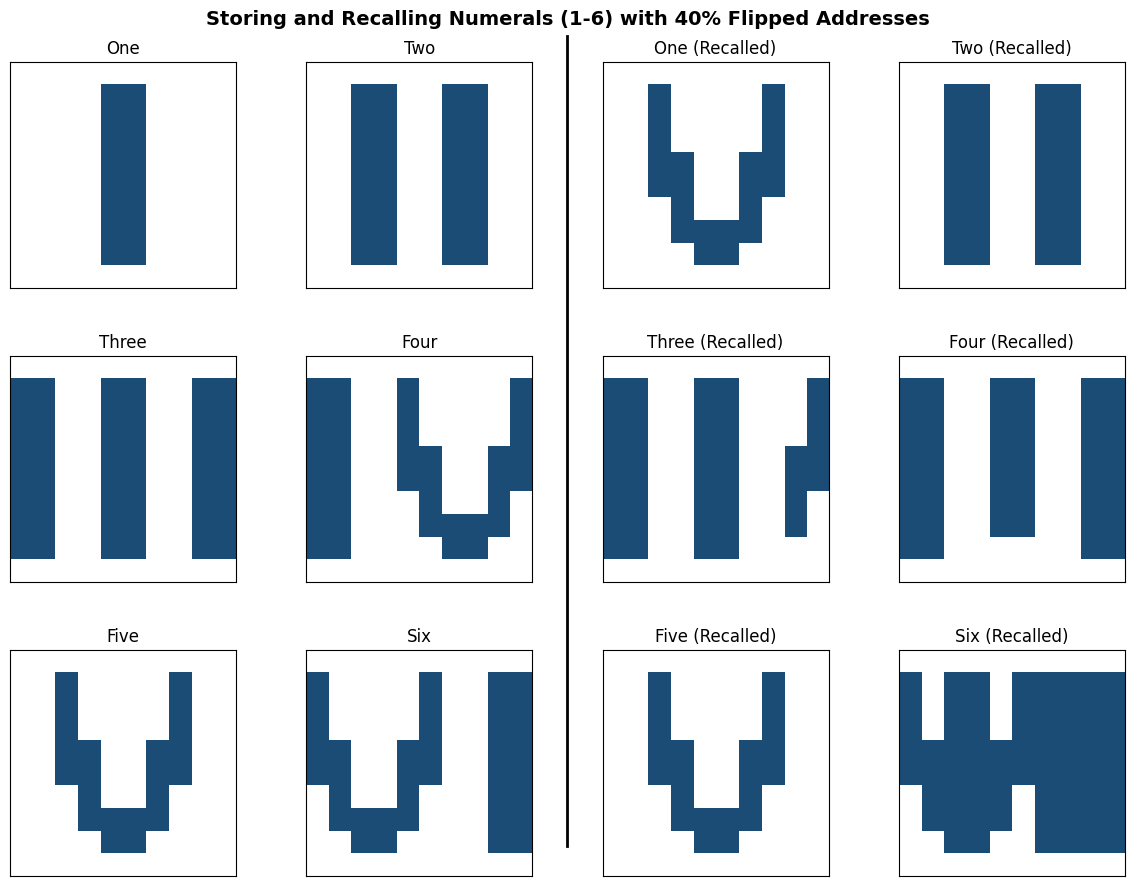

In [21]:
# Numerals class contains binary 10x10 matrices representing images of Roman numerals from one to six. 
class Numerals:  
    def __init__(self):
        self.one = np.zeros((10, 10))
        self.one[1:9, 4:6] = 1

        self.two = np.zeros((10, 10))
        self.two[1:9, 2:4] = 1
        self.two[1:9, 6:8] = 1

        self.three = np.zeros((10, 10))
        self.three[1:9, 0:2] = 1
        self.three[1:9, 4:6] = 1
        self.three[1:9, 8:10] = 1

        self.four = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 
                              [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 
                              [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                              [1, 1, 0, 0, 0, 1, 1, 1, 1, 0], 
                              [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                              ])

        self.five = np.zeros((10, 10))
        self.five[:, 2:8] += self.four[:, 4:10]

        self.six = self.four[:, ::-1]
    
    # Store all numerals in a list for easy iteration. 
        self.all = [self.one, self.two, self.three, self.four, self.five, self.six]
    
    def __len__(self):
        return len(self.all)
    
    def __getitem__(self, index):
        return self.all[index]

SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

numerals = Numerals()

def store_numerals(times=1): 
    memories = []
    for numeral in numerals: 
        memories.append(numeral.flatten())

    addresses = []
    for i in range(len(memories)): 
        addresses.append(np.random.randint(0, 2, size=SDM.address_dimension))

    # Write numerals to SDM more than once. 
    for t in range(times): 
        for address, memory in zip(addresses, memories): 
            SDM.write(address, memory)

    return addresses

def recall_numerals(addresses): 
    recalled_memories = []
    for i, address in enumerate(addresses): 
        recalled_memory = SDM.read(address)
        recalled_memories.append(recalled_memory)
        numeral = recalled_memory.reshape((10, 10))
    return [memory.reshape((10, 10)) for memory in recalled_memories]

def flip_address_bits(addresses, flip_percentage=0.1):
    flipped_addresses = []
    for address in addresses:
        flipped_address = address.copy()
        num_bits_to_flip = int(len(address) * flip_percentage)
        indices_to_flip = np.random.choice(len(address), size=num_bits_to_flip, replace=False)
        flipped_address[indices_to_flip] = 1 - flipped_address[indices_to_flip]
        flipped_addresses.append(flipped_address)
    return flipped_addresses

def visualize_original_and_recalled(numerals, recalled_numerals):
    names = ["One", "Two", "Three", "Four", "Five", "Six"]
    
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    
    # Create custom colormap: white to navy blue
    from matplotlib.colors import LinearSegmentedColormap
    colors = ['white', '#1a4c75']  # navy blue
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('navy', colors, N=n_bins)
    
    # Row 1: numerals 1-2
    for i in range(2):
        # Original on left
        axes[0, i].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[0, i].set_title(f"{names[i]}")
        axes[0, i].set_xticks([])
        axes[0, i].set_yticks([])
        
        # Recalled on right
        axes[0, i + 2].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[0, i + 2].set_title(f"{names[i]} (Recalled)")
        axes[0, i + 2].set_xticks([])
        axes[0, i + 2].set_yticks([])
    
    # Row 2: numerals 3-4
    for i in range(2, 4):
        # Original on left
        axes[1, i - 2].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[1, i - 2].set_title(f"{names[i]}")
        axes[1, i - 2].set_xticks([])
        axes[1, i - 2].set_yticks([])
        
        # Recalled on right
        axes[1, i].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[1, i].set_title(f"{names[i]} (Recalled)")
        axes[1, i].set_xticks([])
        axes[1, i].set_yticks([])
    
    # Row 3: numerals 5-6
    for i in range(4, 6):
        # Original on left
        axes[2, i - 4].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[2, i - 4].set_title(f"{names[i]}")
        axes[2, i - 4].set_xticks([])
        axes[2, i - 4].set_yticks([])
        
        # Recalled on right
        axes[2, i - 2].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[2, i - 2].set_title(f"{names[i]} (Recalled)")
        axes[2, i - 2].set_xticks([])
        axes[2, i - 2].set_yticks([])
    
    plt.suptitle(f"Storing and Recalling Numerals (1-6) with 40% Flipped Addresses", 
                 fontweight="bold",
                 fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)
    
    # Add vertical black line between original and recalled columns
    fig.add_artist(plt.Line2D([0.5, 0.5], [0.05, 0.95], 
                              transform=fig.transFigure, 
                              color='black', 
                              linewidth=2))
    
    plt.show()

addresses = store_numerals()
flipped_addresses = flip_address_bits(addresses, 0.4)
recalled_numerals = recall_numerals(flipped_addresses)
visualize_original_and_recalled(numerals, recalled_numerals)

### 4.3 Storing images of numerals in SDM, adding random memories, and corrupting the memory addresses. 

In this experiment: 
- The "standard" SDM configuration is used. 
- Each numeral memory vector is a flattened 10x10 matrix representing a numeral (one to six). 
- The address of each numeral memory is randomly generated
- A certain number of random memories are written to the SDM, and then the numerals are read from their original addresses. 
- A certain fraction of the address bits are flipped. 

This experiment shows a combination of the effects applied in the previous experiments (4.1 and 4.2), demonstrating the relative robustness of SDM to data corruption. 

***

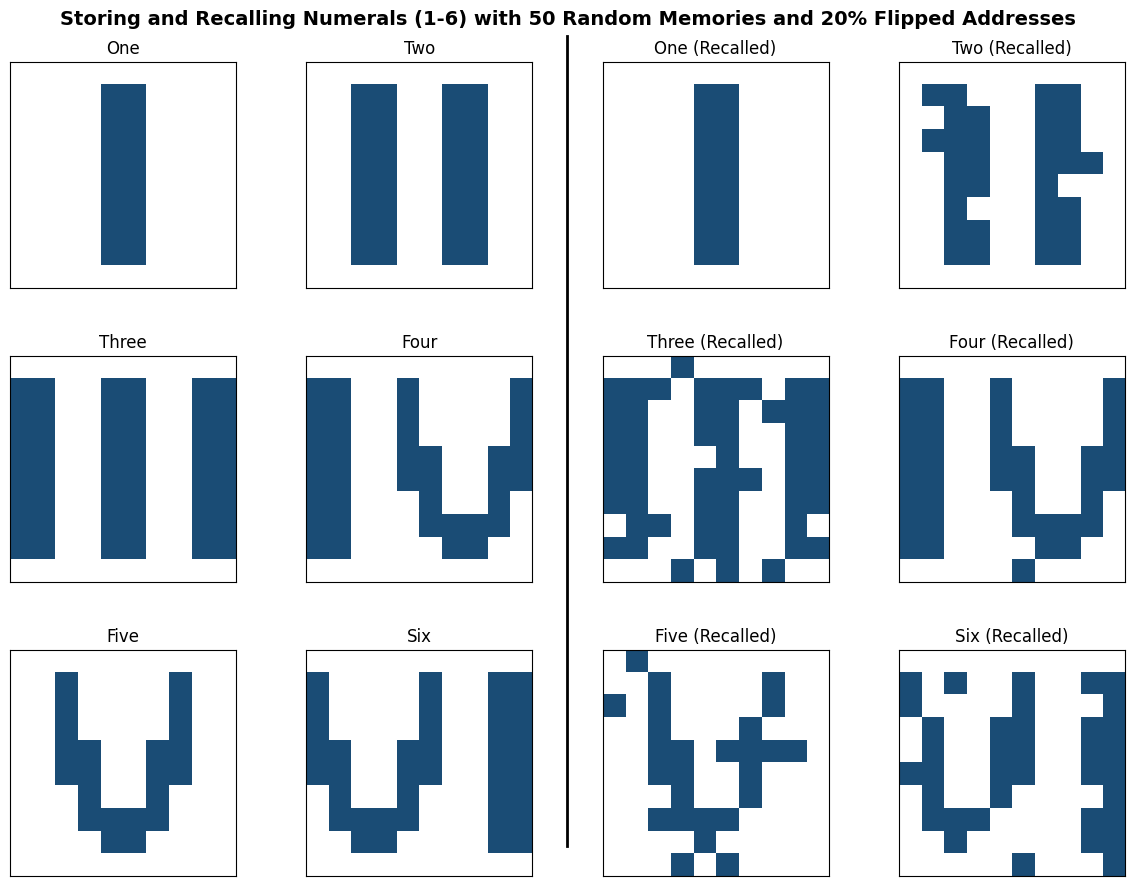

In [22]:
# Numerals class contains binary 10x10 matrices representing images of Roman numerals from one to six. 
class Numerals:  
    def __init__(self):
        self.one = np.zeros((10, 10))
        self.one[1:9, 4:6] = 1

        self.two = np.zeros((10, 10))
        self.two[1:9, 2:4] = 1
        self.two[1:9, 6:8] = 1

        self.three = np.zeros((10, 10))
        self.three[1:9, 0:2] = 1
        self.three[1:9, 4:6] = 1
        self.three[1:9, 8:10] = 1

        self.four = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
                              [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 
                              [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 
                              [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                              [1, 1, 0, 0, 0, 1, 1, 1, 1, 0], 
                              [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                              ])

        self.five = np.zeros((10, 10))
        self.five[:, 2:8] += self.four[:, 4:10]

        self.six = self.four[:, ::-1]
    
    # Store all numerals in a list for easy iteration. 
        self.all = [self.one, self.two, self.three, self.four, self.five, self.six]
    
    def __len__(self):
        return len(self.all)
    
    def __getitem__(self, index):
        return self.all[index]

SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

numerals = Numerals()

def store_numerals(times=1): 
    memories = []
    for numeral in numerals: 
        memories.append(numeral.flatten())

    addresses = []
    for i in range(len(memories)): 
        addresses.append(np.random.randint(0, 2, size=SDM.address_dimension))

    # Write numerals to SDM more than once. 
    for t in range(times): 
        for address, memory in zip(addresses, memories): 
            SDM.write(address, memory)

    return addresses

def recall_numerals(addresses): 
    recalled_memories = []
    for i, address in enumerate(addresses): 
        recalled_memory = SDM.read(address)
        recalled_memories.append(recalled_memory)
        numeral = recalled_memory.reshape((10, 10))
    return [memory.reshape((10, 10)) for memory in recalled_memories]

def flip_address_bits(addresses, flip_percentage=0.1):
    flipped_addresses = []
    for address in addresses:
        flipped_address = address.copy()
        num_bits_to_flip = int(len(address) * flip_percentage)
        indices_to_flip = np.random.choice(len(address), size=num_bits_to_flip, replace=False)
        flipped_address[indices_to_flip] = 1 - flipped_address[indices_to_flip]
        flipped_addresses.append(flipped_address)
    return flipped_addresses

def write_random_memories(amount): 
    for i in range(amount): 
        address = np.random.randint(0, 2, size=SDM.address_dimension)
        memory = np.random.randint(0, 2, size=SDM.address_dimension)
        SDM.write(address, memory)

def visualize_original_and_recalled(numerals, recalled_numerals):
    names = ["One", "Two", "Three", "Four", "Five", "Six"]
    
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    
    # Create custom colormap: white to navy blue
    from matplotlib.colors import LinearSegmentedColormap
    colors = ['white', '#1a4c75']  # navy blue
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('navy', colors, N=n_bins)
    
    # Row 1: numerals 1-2
    for i in range(2):
        # Original on left
        axes[0, i].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[0, i].set_title(f"{names[i]}")
        axes[0, i].set_xticks([])
        axes[0, i].set_yticks([])
        
        # Recalled on right
        axes[0, i + 2].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[0, i + 2].set_title(f"{names[i]} (Recalled)")
        axes[0, i + 2].set_xticks([])
        axes[0, i + 2].set_yticks([])
    
    # Row 2: numerals 3-4
    for i in range(2, 4):
        # Original on left
        axes[1, i - 2].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[1, i - 2].set_title(f"{names[i]}")
        axes[1, i - 2].set_xticks([])
        axes[1, i - 2].set_yticks([])
        
        # Recalled on right
        axes[1, i].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[1, i].set_title(f"{names[i]} (Recalled)")
        axes[1, i].set_xticks([])
        axes[1, i].set_yticks([])
    
    # Row 3: numerals 5-6
    for i in range(4, 6):
        # Original on left
        axes[2, i - 4].imshow(numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[2, i - 4].set_title(f"{names[i]}")
        axes[2, i - 4].set_xticks([])
        axes[2, i - 4].set_yticks([])
        
        # Recalled on right
        axes[2, i - 2].imshow(recalled_numerals[i], cmap=cmap, vmin=0, vmax=1)
        axes[2, i - 2].set_title(f"{names[i]} (Recalled)")
        axes[2, i - 2].set_xticks([])
        axes[2, i - 2].set_yticks([])
    
    plt.suptitle(f"Storing and Recalling Numerals (1-6) with 50 Random Memories and 20% Flipped Addresses", 
                 fontweight="bold",
                 fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)
    
    # Add vertical black line between original and recalled columns
    fig.add_artist(plt.Line2D([0.5, 0.5], [0.05, 0.95], 
                              transform=fig.transFigure, 
                              color='black', 
                              linewidth=2))
    
    plt.show()

addresses = store_numerals()
flipped_addresses = flip_address_bits(addresses, 0.2)
write_random_memories(50)
recalled_numerals = recall_numerals(flipped_addresses)
visualize_original_and_recalled(numerals, recalled_numerals)

## 5.0 Other experiments with SDM

In this section, some miscellaneous experiments are conducted. 

***

### 5.1 Storing and recalling dense data

In this experiment: 
- The "standard" SDM configuration is used. 
- Addresses are random (for both actual memories and noise memories).
- The actual memories are quasi-dense. The set of memories can be thought of as 100 images, each with one more dark pixel than the previous image.
- The noise memories are random. 

This experiment is a demonstration of SDM's ability to store dense structured data, and recall it even after storing a large amount of noisy (random) data. 

***

Total errors across all memories: 112
Overall mean error per bit: 0.0112
Perfect recalls (0 errors): 47/100
Mean error per memory: min=0.0000, max=0.0500


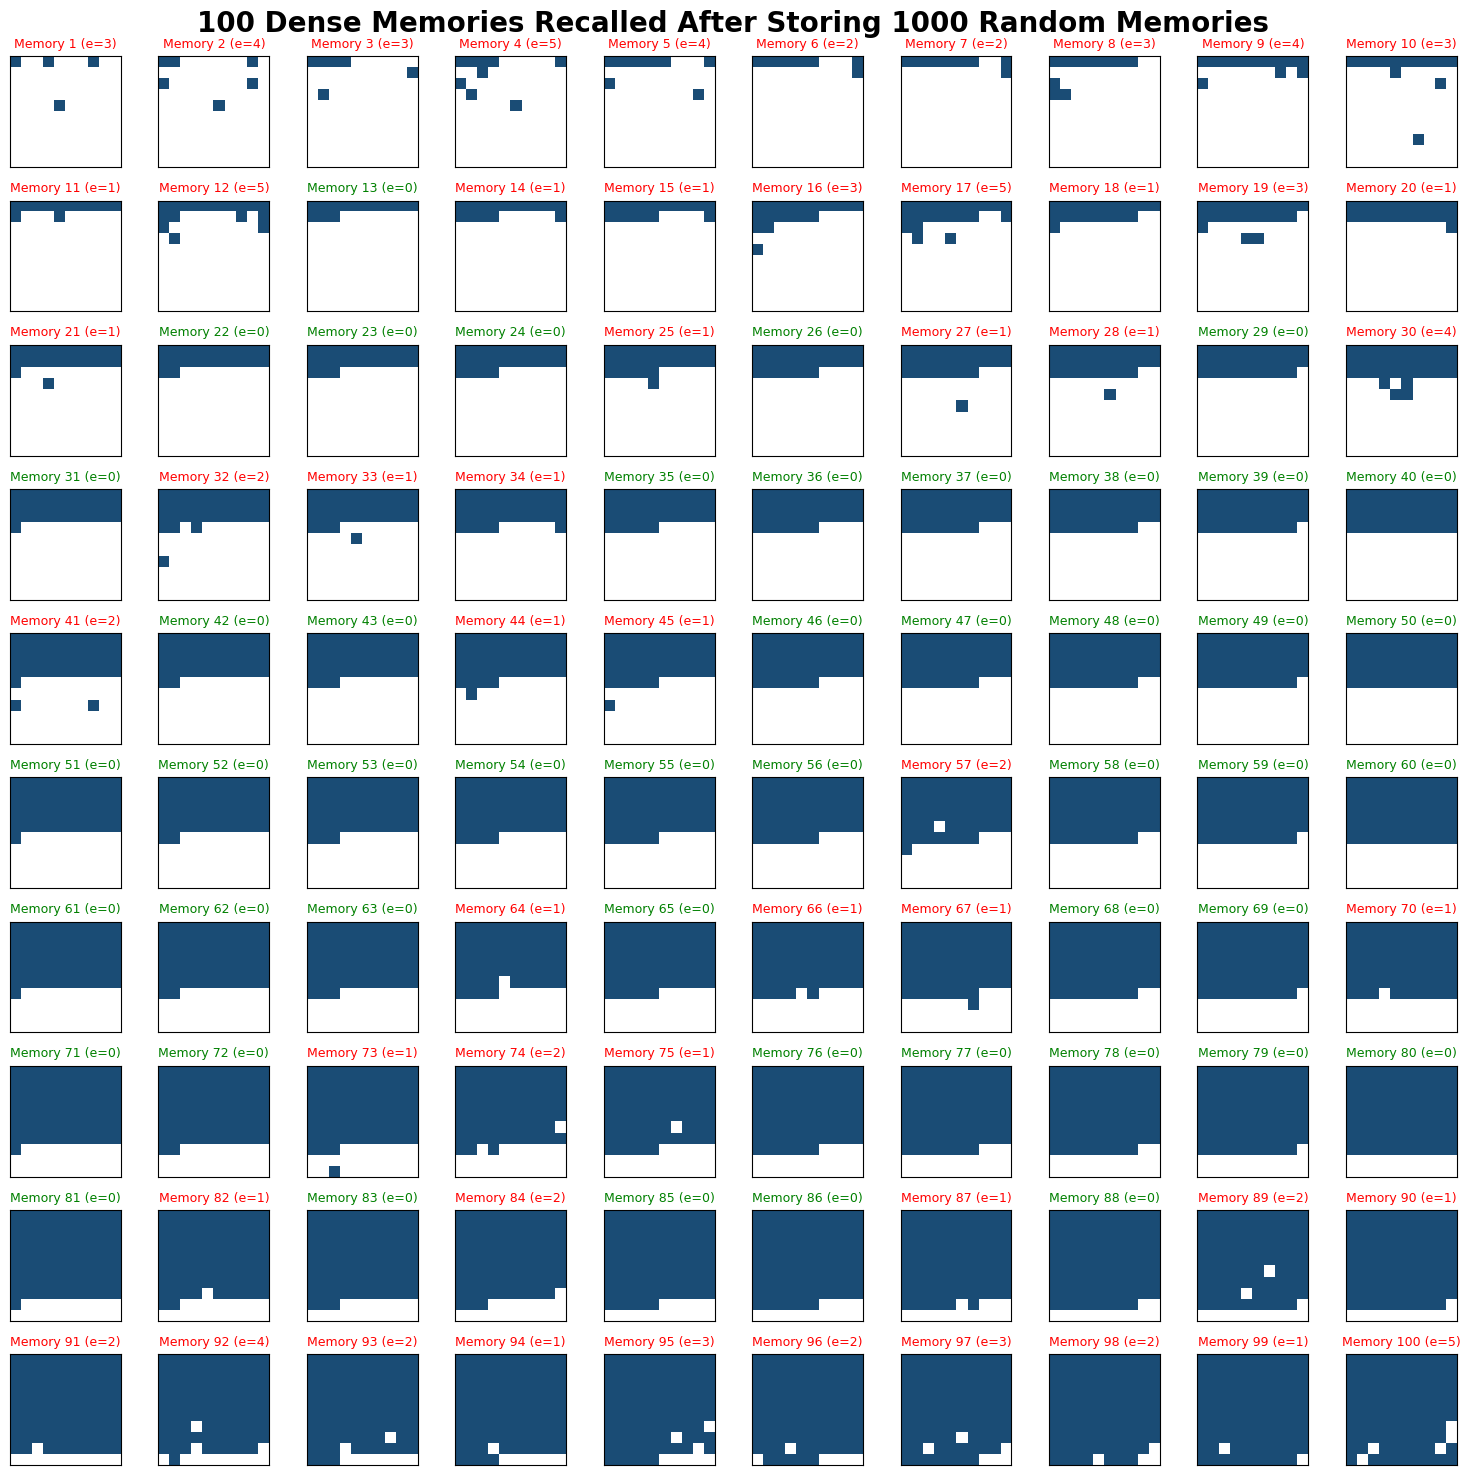

In [23]:
import numpy as np
import matplotlib.pyplot as plt

SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=37
)

addresses = np.random.randint(0, 2, (100, 100))

memories = np.zeros((100, 100))
memories = np.tril(np.ones((100, 100))) 

# Store actual memories. 
for i in range(100): 
    SDM.write(addresses[i], memories[i])

# Store noise memories. 
num_random_memories = 1000
for i in range(num_random_memories): 
    address = np.random.randint(0, 2, (100))
    memory = np.random.randint(0, 2, (100))
    SDM.write(address, memory)
    

recalled_memories = np.zeros((100, 100))
for i in range(100):
    recalled_memories[i] = SDM.read(addresses[i])

# Calculate recall error.
recall_errors = np.abs(recalled_memories - memories)
total_error = np.sum(recall_errors)
mean_error_per_memory = np.mean(recall_errors, axis=1)
overall_mean_error = np.mean(recall_errors)
perfect_recalls = np.sum(np.all(recall_errors == 0, axis=1))

print(f"Total errors across all memories: {total_error:.0f}")
print(f"Overall mean error per bit: {overall_mean_error:.4f}")
print(f"Perfect recalls (0 errors): {perfect_recalls}/100")
print(f"Mean error per memory: min={np.min(mean_error_per_memory):.4f}, max={np.max(mean_error_per_memory):.4f}")

# Create custom colormap: white to navy blue
from matplotlib.colors import LinearSegmentedColormap
colors = ["white", "#1a4c75"]  # navy blue
n_bins = 100
cmap = LinearSegmentedColormap.from_list("navy", colors, N=n_bins)

fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.suptitle(f"100 Dense Memories Recalled After Storing {num_random_memories} Random Memories", 
             fontsize=20, 
             fontweight="bold"
            )

for idx in range(100):
    row = idx // 10
    col = idx % 10
    ax = axes[row, col]
    memory_reshaped = recalled_memories[idx].reshape(10, 10)
    ax.imshow(memory_reshaped, cmap=cmap, interpolation="nearest", vmin=0, vmax=1)
    
    # Color title based on recall quality.
    error_count = np.sum(recall_errors[idx])
    title_color = "green" if error_count == 0 else "red" if error_count > 5 else "red"
    ax.set_title(f"Memory {idx+1} (e={error_count:.0f})", fontsize=9, color=title_color)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### 5.2 Varying the address dimension relative to the memory dimension

In this experiment: 
- The "standard" SDM configuration is used, except for the address dimension which is varied from 10 to 1000. 
- Addresses and memories are not the same, and are both random. 

This experiment shows that (at least for random data) the optimal address dimension is approximately equal to the memory dimension. 

***

100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


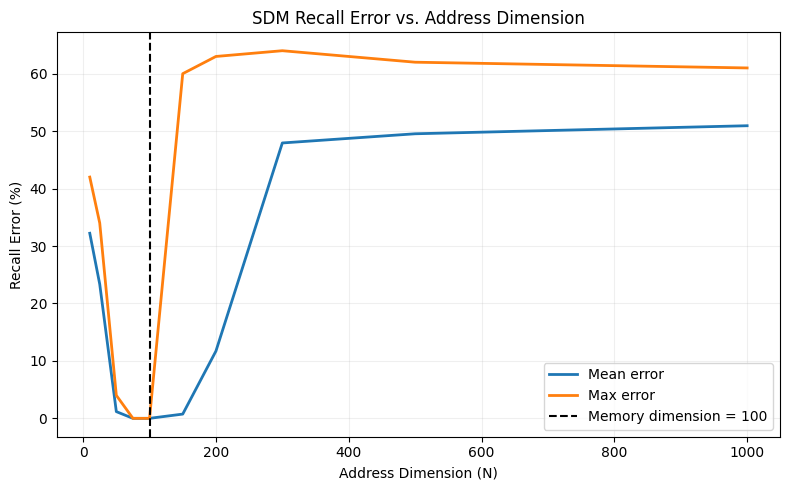

In [24]:
address_dimensions = [10, 25, 50, 75, 100, 150, 200, 300, 500, 1000]
memory_dimension = 100
mean_errors = []
max_errors = []

# Outer loop over address dimensions.
for N in tqdm(address_dimensions):
    SDM = KanervaSDM(
        address_dimension=N,
        memory_dimension=memory_dimension,  
        num_locations=10000,
        activation_threshold=int(0.37 * N)  
    )
    num_memories = 100

    # Preallocate arrays.
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.random.randint(0, 2, SDM.memory_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories.
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors.
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(address_dimensions, mean_errors, linewidth=2, label="Mean error")
plt.plot(address_dimensions, max_errors, linewidth=2, label="Max error")
plt.axvline(x=memory_dimension, color='black', linestyle='--', linewidth=1.5, label=f'Memory dimension = {memory_dimension}')
plt.xlabel("Address Dimension (N)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Address Dimension")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()